In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import minimize

In [134]:
plt.rcParams['figure.facecolor'] = 'white'  # Figure background
plt.rcParams['axes.facecolor'] = 'white'   # Axes background
plt.rcParams['figure.dpi'] = 500

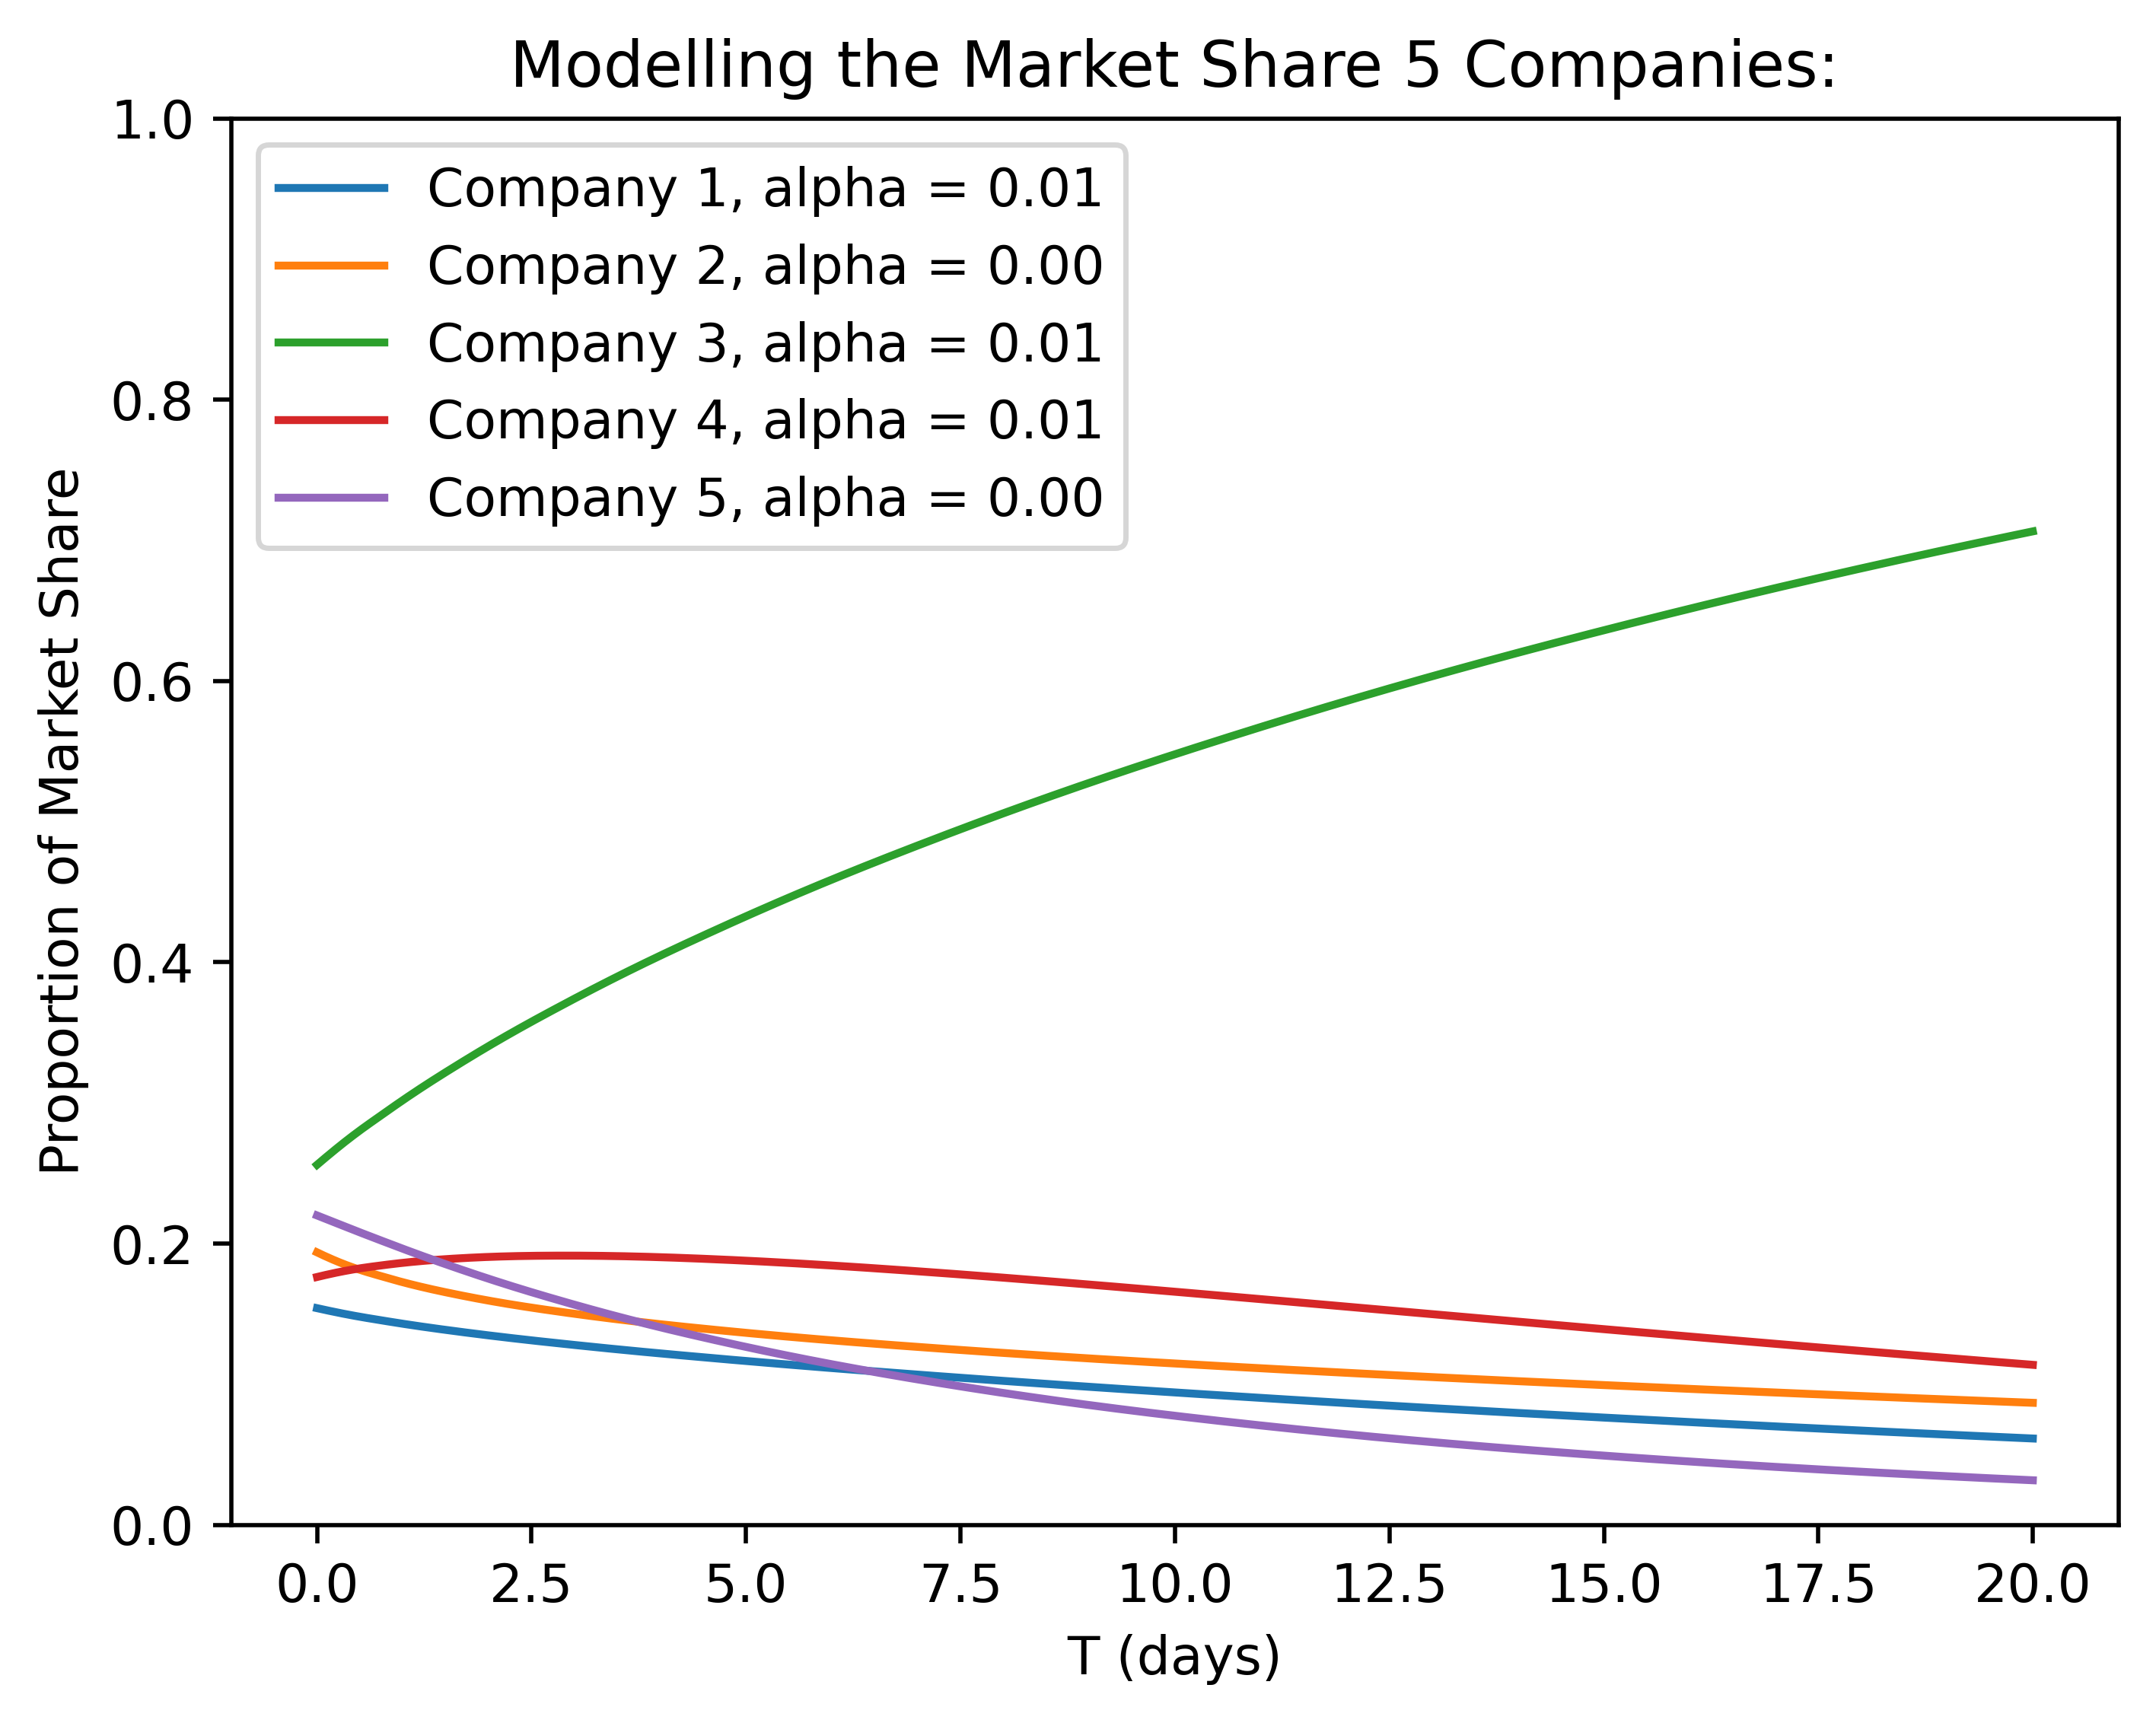

In [135]:
def event_based_model():
    #np.random.seed(44)
    n = 5
    K = 2/3
    alpha_values = np.random.rand(5) / 100
    # alpha_values = np.array([0.4, 0.4, 0.4, 0.4, 0.4])
    beta_values = np.random.rand(5, 5) 
    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(5)
        temporary_alpha = alpha_values.copy()  
        for i in range(5):
            competitive_term = np.sum([beta_values[i, j] * y[j] for j in range(5) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 20
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    #y0 = np.array([0.1, 0.2, 0.3, 0.15, 0.15])
    y0 = np.random.rand(5)
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    #Plot the system
    plt.plot(x_space, sol.y[0],  label=f"Company 1, alpha = {alpha_values[0]:.2f}")
    plt.plot(x_space, sol.y[1],  label=f"Company 2, alpha = {alpha_values[1]:.2f}")
    plt.plot(x_space, sol.y[2],  label=f"Company 3, alpha = {alpha_values[2]:.2f}")
    plt.plot(x_space, sol.y[3],  label=f"Company 4, alpha = {alpha_values[3]:.2f}")
    plt.plot(x_space, sol.y[4],  label=f"Company 5, alpha = {alpha_values[4]:.2f}")
    plt.ylabel("Proportion of Market Share")
    plt.xlabel("T (days)")
    plt.title("Modelling the Market Share 5 Companies:")
    plt.ylim(0, 1)
    plt.legend()

    plt.show()
    return sol.y, alpha_values, beta_values
    
solution = event_based_model()

In [136]:
solution[1]

array([0.00806822, 0.0045489 , 0.00872448, 0.00641384, 0.00033224])

In [137]:
solution[2]

array([[0.46990718, 0.10590892, 0.59267706, 0.54214307, 0.85797632],
       [0.49407281, 0.49337193, 0.3123859 , 0.95843983, 0.73962936],
       [0.64765818, 0.66618397, 0.66553642, 0.0778315 , 0.30641356],
       [0.67446708, 0.59508484, 0.56492722, 0.60181979, 0.02522719],
       [0.37843688, 0.0883195 , 0.85119085, 0.96871745, 0.04635206]])

In [138]:
solution[0][:, -1].sum()

1.0

In [139]:
import yfinance as yf
import pandas as pd

In [140]:
def clean(ticker):
    ydf = yf.download(ticker, interval="1d")
    #ydf.to_csv(f'y{ticker}.csv')
    ydf.to_csv(f'test.csv')

    # btc = pd.read_csv(f'y{ticker}.csv')
    df = pd.read_csv(f'test.csv')
    df = df.drop([0,1])
    df['Date'] = pd.to_datetime(df['Price']).dt.date
    # btc['Date'] = pd.to_datetime(btc['Price']).dt.floor('T')
    df = df.set_index('Date')
    df = df.drop(['Price'], axis = 1)
    df = df.reset_index()
    df['Ticker'] = ticker
    return df

In [141]:
KO = clean('KO')
PEP = clean('PEP')
KDP = clean('KDP')
MNST = clean('MNST')
CELH = clean('CELH')
#combine data
df = pd.concat([clean('KO'), 
                  clean('PEP'),
                  clean('KDP'),
                  clean('MNST'),
                  clean('CELH')])

df['Date'] = pd.to_datetime(df.Date)
df = df.sort_values('Date')
# df = df.query("Date >=  '2018-10-08'")
#rename and fix dtype
df = df.rename(columns = {'Date': 'date',
                              'Adj Close': 'adj_prc',
                              'Close': 'prc',
                              'High': 'high',
                              'Low': 'low',
                              'Open': 'open',
                              'Volume': 'vol',
                              "Ticker": 'tick'
                            })

df = df.apply(lambda x: x.astype(float) if x.dtype == 'object' and x.name != 'tick' else x)
df.set_index('date',inplace=True)
df.reset_index(inplace = True)
df.dtypes
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,date,adj_prc,prc,high,low,open,vol,tick
0,1962-01-02,0.046381,0.263021,0.270182,0.263021,0.263021,806400.0,KO
1,1962-01-03,0.045348,0.257161,0.259115,0.253255,0.259115,1574400.0,KO
2,1962-01-04,0.045692,0.259115,0.261068,0.257813,0.257813,844800.0,KO
3,1962-01-05,0.044659,0.253255,0.262370,0.252604,0.259115,1420800.0,KO
4,1962-01-08,0.044200,0.250651,0.251302,0.245768,0.251302,2035200.0,KO
...,...,...,...,...,...,...,...,...
47581,2024-12-05,62.965000,62.965000,62.994999,62.110001,62.470001,10228573.0,KO
47582,2024-12-05,32.855000,32.855000,32.868801,32.459999,32.730000,2447914.0,KDP
47583,2024-12-05,160.850204,160.850204,161.009995,158.830002,160.929993,2418348.0,PEP
47584,2024-12-05,53.525002,53.525002,54.070000,53.410000,54.020000,1906726.0,MNST


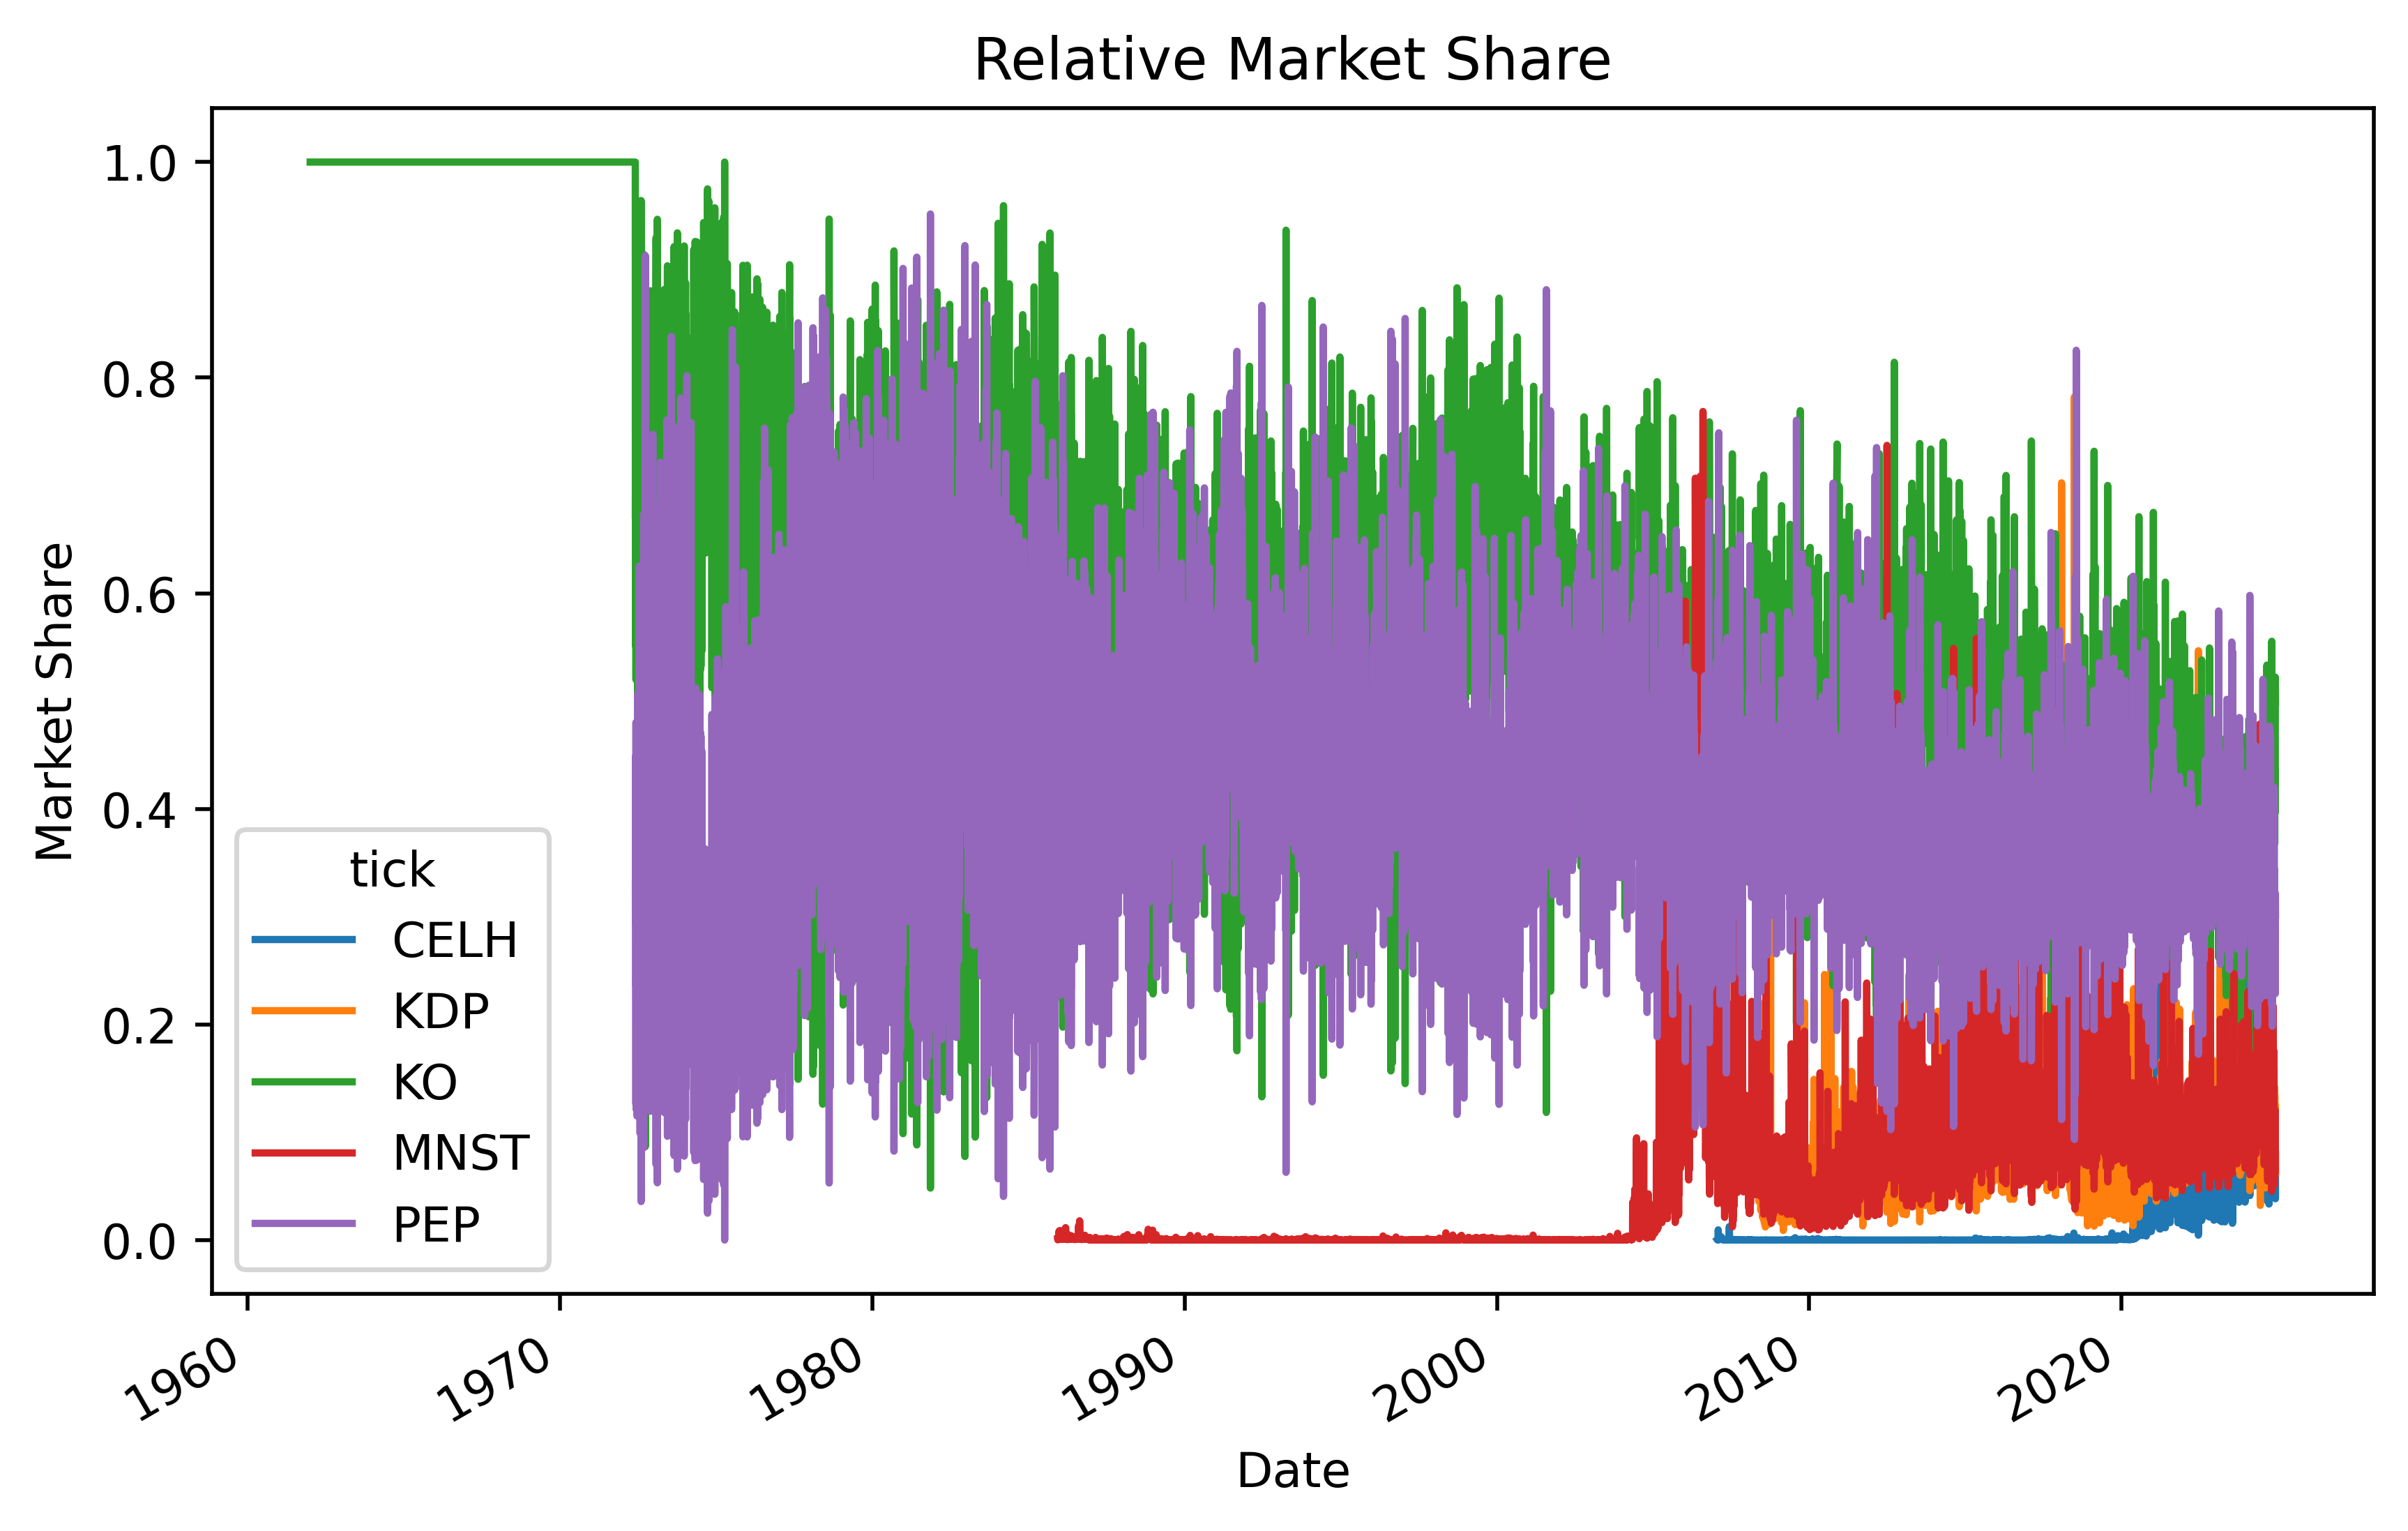

In [142]:
df['mktcap'] = df['prc'] * df['vol']
df['total_mktcap'] = df.groupby('date')['mktcap'].transform('sum')
df['rel_mktcap'] = df['mktcap'] / df['total_mktcap']
port = df.groupby(['date','tick'])['rel_mktcap'].sum()
port = port.unstack(level=['tick'])
#port = port.query("date >= '2021-01'")
port.plot(figsize=(8,5))
plt.title('Relative Market Share')
plt.ylabel("Market Share")
plt.xlabel("Date")
plt.show()

In [143]:
df.head(15)
df.date.min()

Timestamp('1962-01-02 00:00:00')

In [144]:
# tickers = ["KO", "PEP", "KDP", "MNST", "CELH"]

# df = yf.Ticker(["KO", "PEP", "KDP", "MNST", "CELH"]).history(period="1y")

# Print a summary of the data for each ticker
# for ticker, data in df.items():
#     print(f"\nHistorical data summary for {ticker}:")
#     print(f"Date range: {data.index[0]} to {data.index[-1]}")
#     print(f"Number of trading days: {len(data)}")
#     print(f"Latest closing price: ${data['Close'].iloc[-1]:.2f}")
#     print(f"Highest price: ${data['High'].max():.2f}")
#     print(f"Lowest price: ${data['Low'].min():.2f}")
#     print(f"Average daily volume: {data['Volume'].mean():.0f}")


# df


In [145]:

#paths to relevant stock data and feature data
#return_data = "/Users/brandonwaits/Documents/Semester 5/FIN 415R/CMJ/msf.parquet"
feature_data = "/Users/brandonwaits/Documents/Semester 5/FIN 415R/CMJ/features.parquet"

#monthtly_ret = pd.read_parquet(return_data)
features = pd.read_parquet(feature_data)
#make the file columns match
features = features.rename(columns={
    'PERMNO': 'permno',
    'DATE': 'date',
    'SICCD.X': 'siccd'})

#set the dates to monthly timestamps
features['date'] = pd.to_datetime(features['date']).dt.to_period('M')
#monthtly_ret['date'] = pd.to_datetime(monthtly_ret['date']).dt.to_period('M')




In [146]:
features

,permno,spread_mean,date,PERMCO.x,SHRCD.x,EXCHCD.x,SICCD.x,PRC.x,VOL.x,RET.x,...,p5_n,total_vol,p7_intercept,p7_n,std_vol,p9_intercept,p9_n,std_turn,cum_return_1_0,market_cap
547,10002.0,0.091957,1998-06,7954.0,11.0,3.0,6710.0,30.000000,360.0,0.095545,...,19.0,0.053811,6.354000e+02,19.0,1.447995e+03,0.014958,19.0,0.034087,0.122449,1.274400e+05
548,10002.0,0.072133,1998-07,7954.0,11.0,3.0,6710.0,19.750000,173.0,-0.012500,...,21.0,0.032873,1.636636e+03,21.0,1.900806e+03,0.038527,21.0,0.044746,0.095545,1.258470e+05
549,10002.0,0.062000,1998-08,7954.0,11.0,3.0,6710.0,16.500000,223.0,-0.164557,...,21.0,0.039652,7.852727e+02,21.0,1.073982e+03,0.012324,21.0,0.016855,-0.012500,1.051380e+05
550,10002.0,0.072154,1998-09,7954.0,11.0,3.0,6710.0,16.250000,132.0,-0.010000,...,20.0,0.043255,1.062905e+03,20.0,1.013641e+03,0.016681,20.0,0.015908,-0.164557,1.060475e+05
551,10002.0,0.094432,1998-10,7954.0,11.0,3.0,6710.0,15.000000,299.0,-0.076923,...,20.0,0.030065,6.299048e+02,20.0,1.034741e+03,0.009886,20.0,0.016239,-0.010000,9.789000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3568650,93436.0,0.000152,2023-08,53453.0,11.0,3.0,9999.0,258.079987,25029170.0,-0.034962,...,19.0,0.033511,1.196715e+08,19.0,2.250092e+07,3.770371,19.0,0.708916,0.021622,8.191443e+08
3568651,93436.0,0.000133,2023-09,53453.0,11.0,3.0,9999.0,250.220001,24395440.0,-0.030456,...,22.0,0.030381,1.088225e+08,22.0,1.476294e+07,3.428566,22.0,0.465122,-0.034962,7.954494e+08
3568652,93436.0,0.000177,2023-10,53453.0,11.0,3.0,9999.0,200.839996,25905681.0,-0.197346,...,19.0,0.033652,1.219772e+08,19.0,1.686876e+07,3.842701,19.0,0.531342,-0.030456,6.384545e+08
3568653,93436.0,0.000245,2023-11,53453.0,11.0,3.0,9999.0,240.080002,26395792.0,0.195379,...,21.0,0.031069,1.177531e+08,21.0,1.954419e+07,3.704144,21.0,0.614813,-0.197346,7.631954e+08


In [147]:
#Profitability metrics
GPOA = "prof" #gross profits over assets
ROE = "roe" #return on equity
ROA = "roa" #return on assets
CFOA = "free_cf" #free cash flow over assets

prof_metrics = [GPOA, ROE, ROA, CFOA]

generic_metrics = ["permno", "date"]

metrics = generic_metrics + prof_metrics 

#filter the features dataframe to only consider metrics used in the paper
features = features[metrics]
features

,permno,date,prof,roe,roa,free_cf
547,10002.0,1998-06,0.297231,0.116470,0.013693,0.091361
548,10002.0,1998-07,0.392086,0.100408,0.013506,0.133980
549,10002.0,1998-08,0.392086,0.100408,0.013506,0.133980
550,10002.0,1998-09,0.392086,0.100408,0.013506,0.133980
551,10002.0,1998-10,0.392086,0.100408,0.013506,0.133980
...,...,...,...,...,...,...
3568650,93436.0,2023-08,0.549279,0.415583,0.202089,0.204082
3568651,93436.0,2023-09,0.549279,0.415583,0.202089,0.204082
3568652,93436.0,2023-10,0.549279,0.415583,0.202089,0.204082
3568653,93436.0,2023-11,0.549279,0.415583,0.202089,0.204082


In [148]:
#create growth metrics
def pct_change(x):
    try:
        return (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
    except ZeroDivisionError:
        return np.nan

for i in prof_metrics:
    features[f"{i}_growth"] = features.groupby('permno')[i].pct_change(periods=60).reset_index(drop=True) #growth over past 5 years 

#function creates inf values. If a company started at zero, we set its growth to NaN.
#This detail is ground for future examination.
features = features.replace([np.inf, -np.inf], np.nan) 
features = features.dropna()


#add growth metrics to list of total
growth_metrics = [f"{i}_growth" for i in prof_metrics]
metrics = metrics + growth_metrics



features = features[metrics]


#ensure correct data type
features['permno'].astype(int)


features

/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/1881279094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f"{i}_growth"] = features.groupby('permno')[i].pct_change(periods=60).reset_index(drop=True) #growth over past 5 years
/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/1881279094.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[f"{i}_growth"] = features.groupby('permno')[i].pct_change(periods=60).reset_index(drop=True) #growth over past 5 years


,permno,date,prof,roe,roa,free_cf,prof_growth,roe_growth,roa_growth,free_cf_growth
580,10002.0,2001-03,0.408555,0.113748,0.013308,0.131238,0.191230,-0.192057,-0.347867,-0.889341
671,10002.0,2008-10,0.224295,0.044657,0.004571,0.009995,1.097116,-1.328390,-1.171663,-0.848908
672,10002.0,2008-11,0.224295,0.044657,0.004571,0.009995,1.097116,-1.328390,-1.171663,-0.848908
673,10002.0,2008-12,0.224295,0.044657,0.004571,0.009995,1.097116,-1.328390,-1.171663,-0.848908
950,10006.0,1958-04,0.387135,0.093074,0.046354,0.045375,0.077657,-0.047340,-0.152369,13.471615
...,...,...,...,...,...,...,...,...,...,...
1709842,50818.0,1982-10,0.756321,0.407558,0.166316,-0.879746,0.443472,-0.611892,-0.487222,-0.169882
1709850,50818.0,1983-06,0.756321,0.407558,0.166316,-0.879746,-0.187207,-0.598698,-0.761752,-0.973444
1709857,50818.0,1984-01,0.651643,0.002420,0.000749,-0.873600,-0.187207,-0.598698,-0.761752,-0.973444
1709859,50818.0,1984-03,0.651643,0.002420,0.000749,-0.873600,-0.655110,-1.118905,-1.138322,-0.995453


Soft Drinks: 2086

All Public Beverage Companies: 208

In [149]:
df = pd.read_feather("crsp_monthly.ftr")

df

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr
0,10000,1986-01-31,68391610,OMFGA,10,3,3990,-4.37500,NaN,1771.0,3680.0,1.0
1,10000,1986-02-28,68391610,OMFGA,10,3,3990,-3.25000,-0.257143,828.0,3680.0,1.0
2,10000,1986-03-31,68391610,OMFGA,10,3,3990,-4.43750,0.365385,1078.0,3680.0,1.0
3,10000,1986-04-30,68391610,OMFGA,10,3,3990,-4.00000,-0.098592,957.0,3793.0,1.0
4,10000,1986-05-30,68391610,OMFGA,10,3,3990,-3.10938,-0.222656,1074.0,3793.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4889699,93436,2023-08-31,88160R10,TSLA,11,3,9999,258.07999,-0.034962,25029170.0,3173994.0,1.0
4889700,93436,2023-09-29,88160R10,TSLA,11,3,9999,250.22000,-0.030456,24395440.0,3179000.0,1.0
4889701,93436,2023-10-31,88160R10,TSLA,11,3,9999,200.84000,-0.197346,25905681.0,3178921.0,1.0
4889702,93436,2023-11-30,88160R10,TSLA,11,3,9999,240.08000,0.195379,26395792.0,3178921.0,1.0


In [150]:
df = df.query("ticker in ['KO', 'PEP', 'KDP', 'DPS', 'MNST','HANS' 'CELH']")
#df = df.query("ticker in ['PEP', 'KDP', 'CELH']")
#KO, PEP, KDP, MNST
#df = df.query("permno in [11308, 13856, 17942, 50470]")
#11308,13856, 17942, 50470
df['mktcap'] = df['prc'] * df['shr']
df['total_mktcap'] = df.groupby('caldt')['mktcap'].transform('sum')
df['rel_mktcap'] = df['mktcap'] / df['total_mktcap']
df


/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/681956803.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mktcap'] = df['prc'] * df['shr']
/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/681956803.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_mktcap'] = df.groupby('caldt')['mktcap'].transform('sum')
/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/681956803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,shr,cumfacshr,mktcap,total_mktcap,rel_mktcap
200171,11308,1962-07-31,None,KO,11,1,2087,85.750,0.120915,632.0,13836.0,384.0,1186437.00,1.455470e+06,0.815158
200172,11308,1962-08-31,None,KO,11,1,2087,85.125,-0.007289,526.0,13836.0,384.0,1177789.50,1.446822e+06,0.814053
200173,11308,1962-09-28,None,KO,11,1,2087,78.500,-0.070778,386.0,13836.0,384.0,1086126.00,1.320918e+06,0.822251
200174,11308,1962-10-31,None,KO,11,1,2087,79.500,0.012739,717.0,13836.0,384.0,1099962.00,1.349428e+06,0.815132
200175,11308,1962-11-30,None,KO,11,1,2087,86.250,0.092453,826.0,13836.0,384.0,1193355.00,1.472170e+06,0.810609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801586,92618,2018-02-28,26138E10,DPS,11,1,2086,116.250,-0.025974,546210.0,179744.0,1.0,20895240.00,3.969672e+08,0.052637
4801587,92618,2018-03-29,26138E10,DPS,11,1,2086,118.380,0.023312,421101.0,179744.0,1.0,21278094.72,3.935558e+08,0.054066
4801588,92618,2018-04-30,26138E10,DPS,11,1,2086,119.960,0.013347,261190.0,180221.0,1.0,21619311.16,3.799535e+08,0.056900
4801589,92618,2018-05-31,26138E10,DPS,11,1,2086,119.300,-0.005502,211527.0,180233.0,1.0,21501796.90,3.754043e+08,0.057276


In [151]:
port = df.groupby(['caldt','ticker'])['rel_mktcap'].sum()
port = port.unstack(level=['ticker'])
port = port.query("caldt >= '2012-01'")
port.fillna(0, inplace=True)
port['KDP'] = port['KDP'] + port['DPS']
port = port[port.columns[1:]]
port

ticker,KDP,KO,MNST,PEP
caldt,,,,
2012-01-31,0.030432,0.560856,0.033279,0.375433
2012-02-29,0.029343,0.574936,0.036244,0.359477
2012-03-30,0.029411,0.573049,0.037405,0.360135
2012-04-30,0.029080,0.582975,0.038747,0.349198
2012-05-31,0.029504,0.569099,0.043184,0.358212
...,...,...,...,...
2023-08-31,0.076977,0.423583,0.098457,0.400983
2023-09-29,0.076869,0.421522,0.095927,0.405682
2023-10-31,0.075158,0.432805,0.094218,0.397820


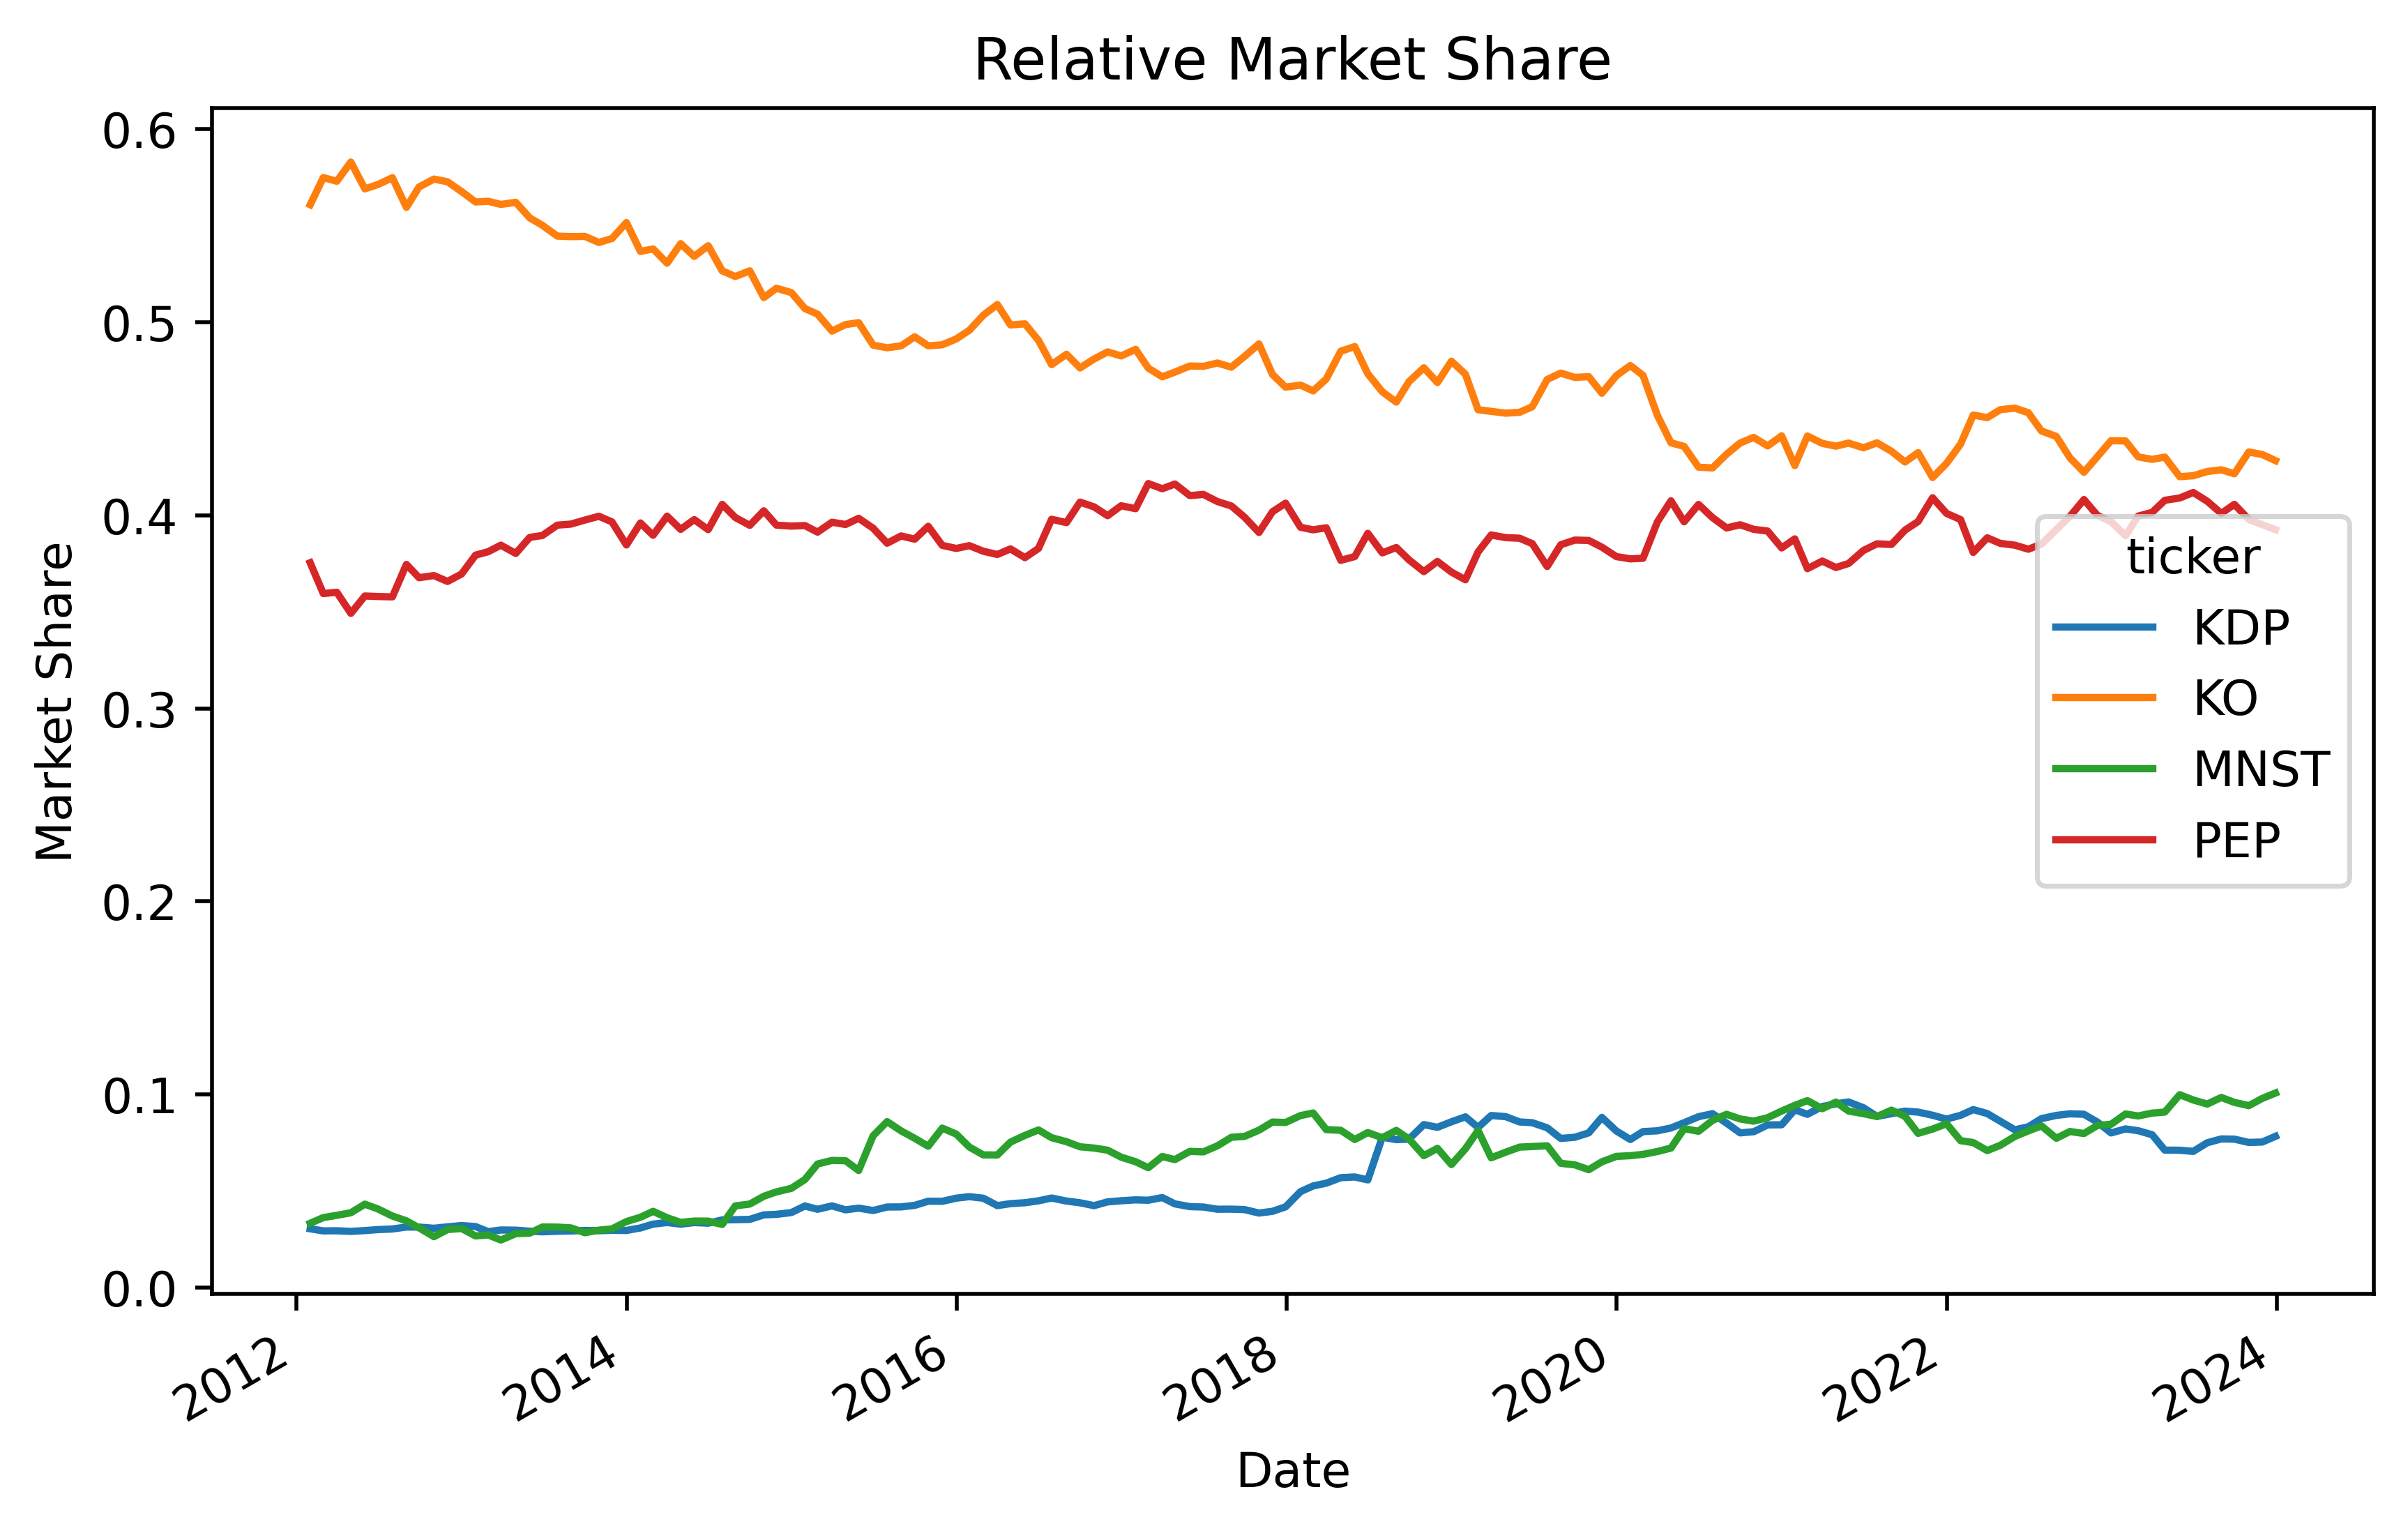

In [152]:
port.plot(figsize=(8,5))
plt.title('Relative Market Share')
plt.ylabel("Market Share")
plt.xlabel("Date")
plt.show()

In [153]:
df['date'] = df['caldt']
# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year and month as 'YYYY-MM'
df['date'] = df['date'].dt.to_period('M')
df = pd.merge(df, features, on = ['permno', 'date'], how='left')
df

/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/3803094274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['caldt']
/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/3803094274.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/m8/5jc738f97052zcblnk5wgd6h0000gn/T/ipykernel_76448/3803094274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,permno,caldt,cusip,ticker,shrcd,excd,siccd,prc,ret,vol,...,rel_mktcap,date,prof,roe,roa,free_cf,prof_growth,roe_growth,roa_growth,free_cf_growth
0,11308,1962-07-31,None,KO,11,1,2087,85.750,0.120915,632.0,...,0.815158,1962-07,0.962137,0.162174,0.100189,0.09375,-0.018656,-0.078307,0.088184,-0.072666
1,11308,1962-08-31,None,KO,11,1,2087,85.125,-0.007289,526.0,...,0.814053,1962-08,0.962137,0.162174,0.100189,0.09375,-0.018656,-0.078307,0.088184,-0.072666
2,11308,1962-09-28,None,KO,11,1,2087,78.500,-0.070778,386.0,...,0.822251,1962-09,0.962137,0.162174,0.100189,0.09375,-0.018656,-0.078307,0.088184,-0.072666
3,11308,1962-10-31,None,KO,11,1,2087,79.500,0.012739,717.0,...,0.815132,1962-10,0.962137,0.162174,0.100189,0.09375,-0.018656,-0.078307,0.088184,-0.072666
4,11308,1962-11-30,None,KO,11,1,2087,86.250,0.092453,826.0,...,0.810609,1962-11,0.962137,0.162174,0.100189,0.09375,-0.018656,-0.078307,0.088184,-0.072666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,92618,2018-02-28,26138E10,DPS,11,1,2086,116.250,-0.025974,546210.0,...,0.052637,2018-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2111,92618,2018-03-29,26138E10,DPS,11,1,2086,118.380,0.023312,421101.0,...,0.054066,2018-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2112,92618,2018-04-30,26138E10,DPS,11,1,2086,119.960,0.013347,261190.0,...,0.056900,2018-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2113,92618,2018-05-31,26138E10,DPS,11,1,2086,119.300,-0.005502,211527.0,...,0.057276,2018-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
set(df['ticker'])

{'DPS', 'KDP', 'KO', 'MNST', 'PEP'}

In [155]:
port = df.groupby(['caldt','ticker'])['rel_mktcap'].sum()
port = port.unstack(level=['ticker'])
port = port.query("caldt >= '2012-01'")
port.fillna(0, inplace=True)

port2 = port.copy()
port2['Other'] = 1 - port2['KO'] - port2['PEP']
port2 = port2[['KO', 'PEP', "Other"]]


port['KDP'] = port['KDP'] + port['DPS']
port = port[port.columns[1:]]
port

ticker,KDP,KO,MNST,PEP
caldt,,,,
2012-01-31,0.030432,0.560856,0.033279,0.375433
2012-02-29,0.029343,0.574936,0.036244,0.359477
2012-03-30,0.029411,0.573049,0.037405,0.360135
2012-04-30,0.029080,0.582975,0.038747,0.349198
2012-05-31,0.029504,0.569099,0.043184,0.358212
...,...,...,...,...
2023-08-31,0.076977,0.423583,0.098457,0.400983
2023-09-29,0.076869,0.421522,0.095927,0.405682
2023-10-31,0.075158,0.432805,0.094218,0.397820


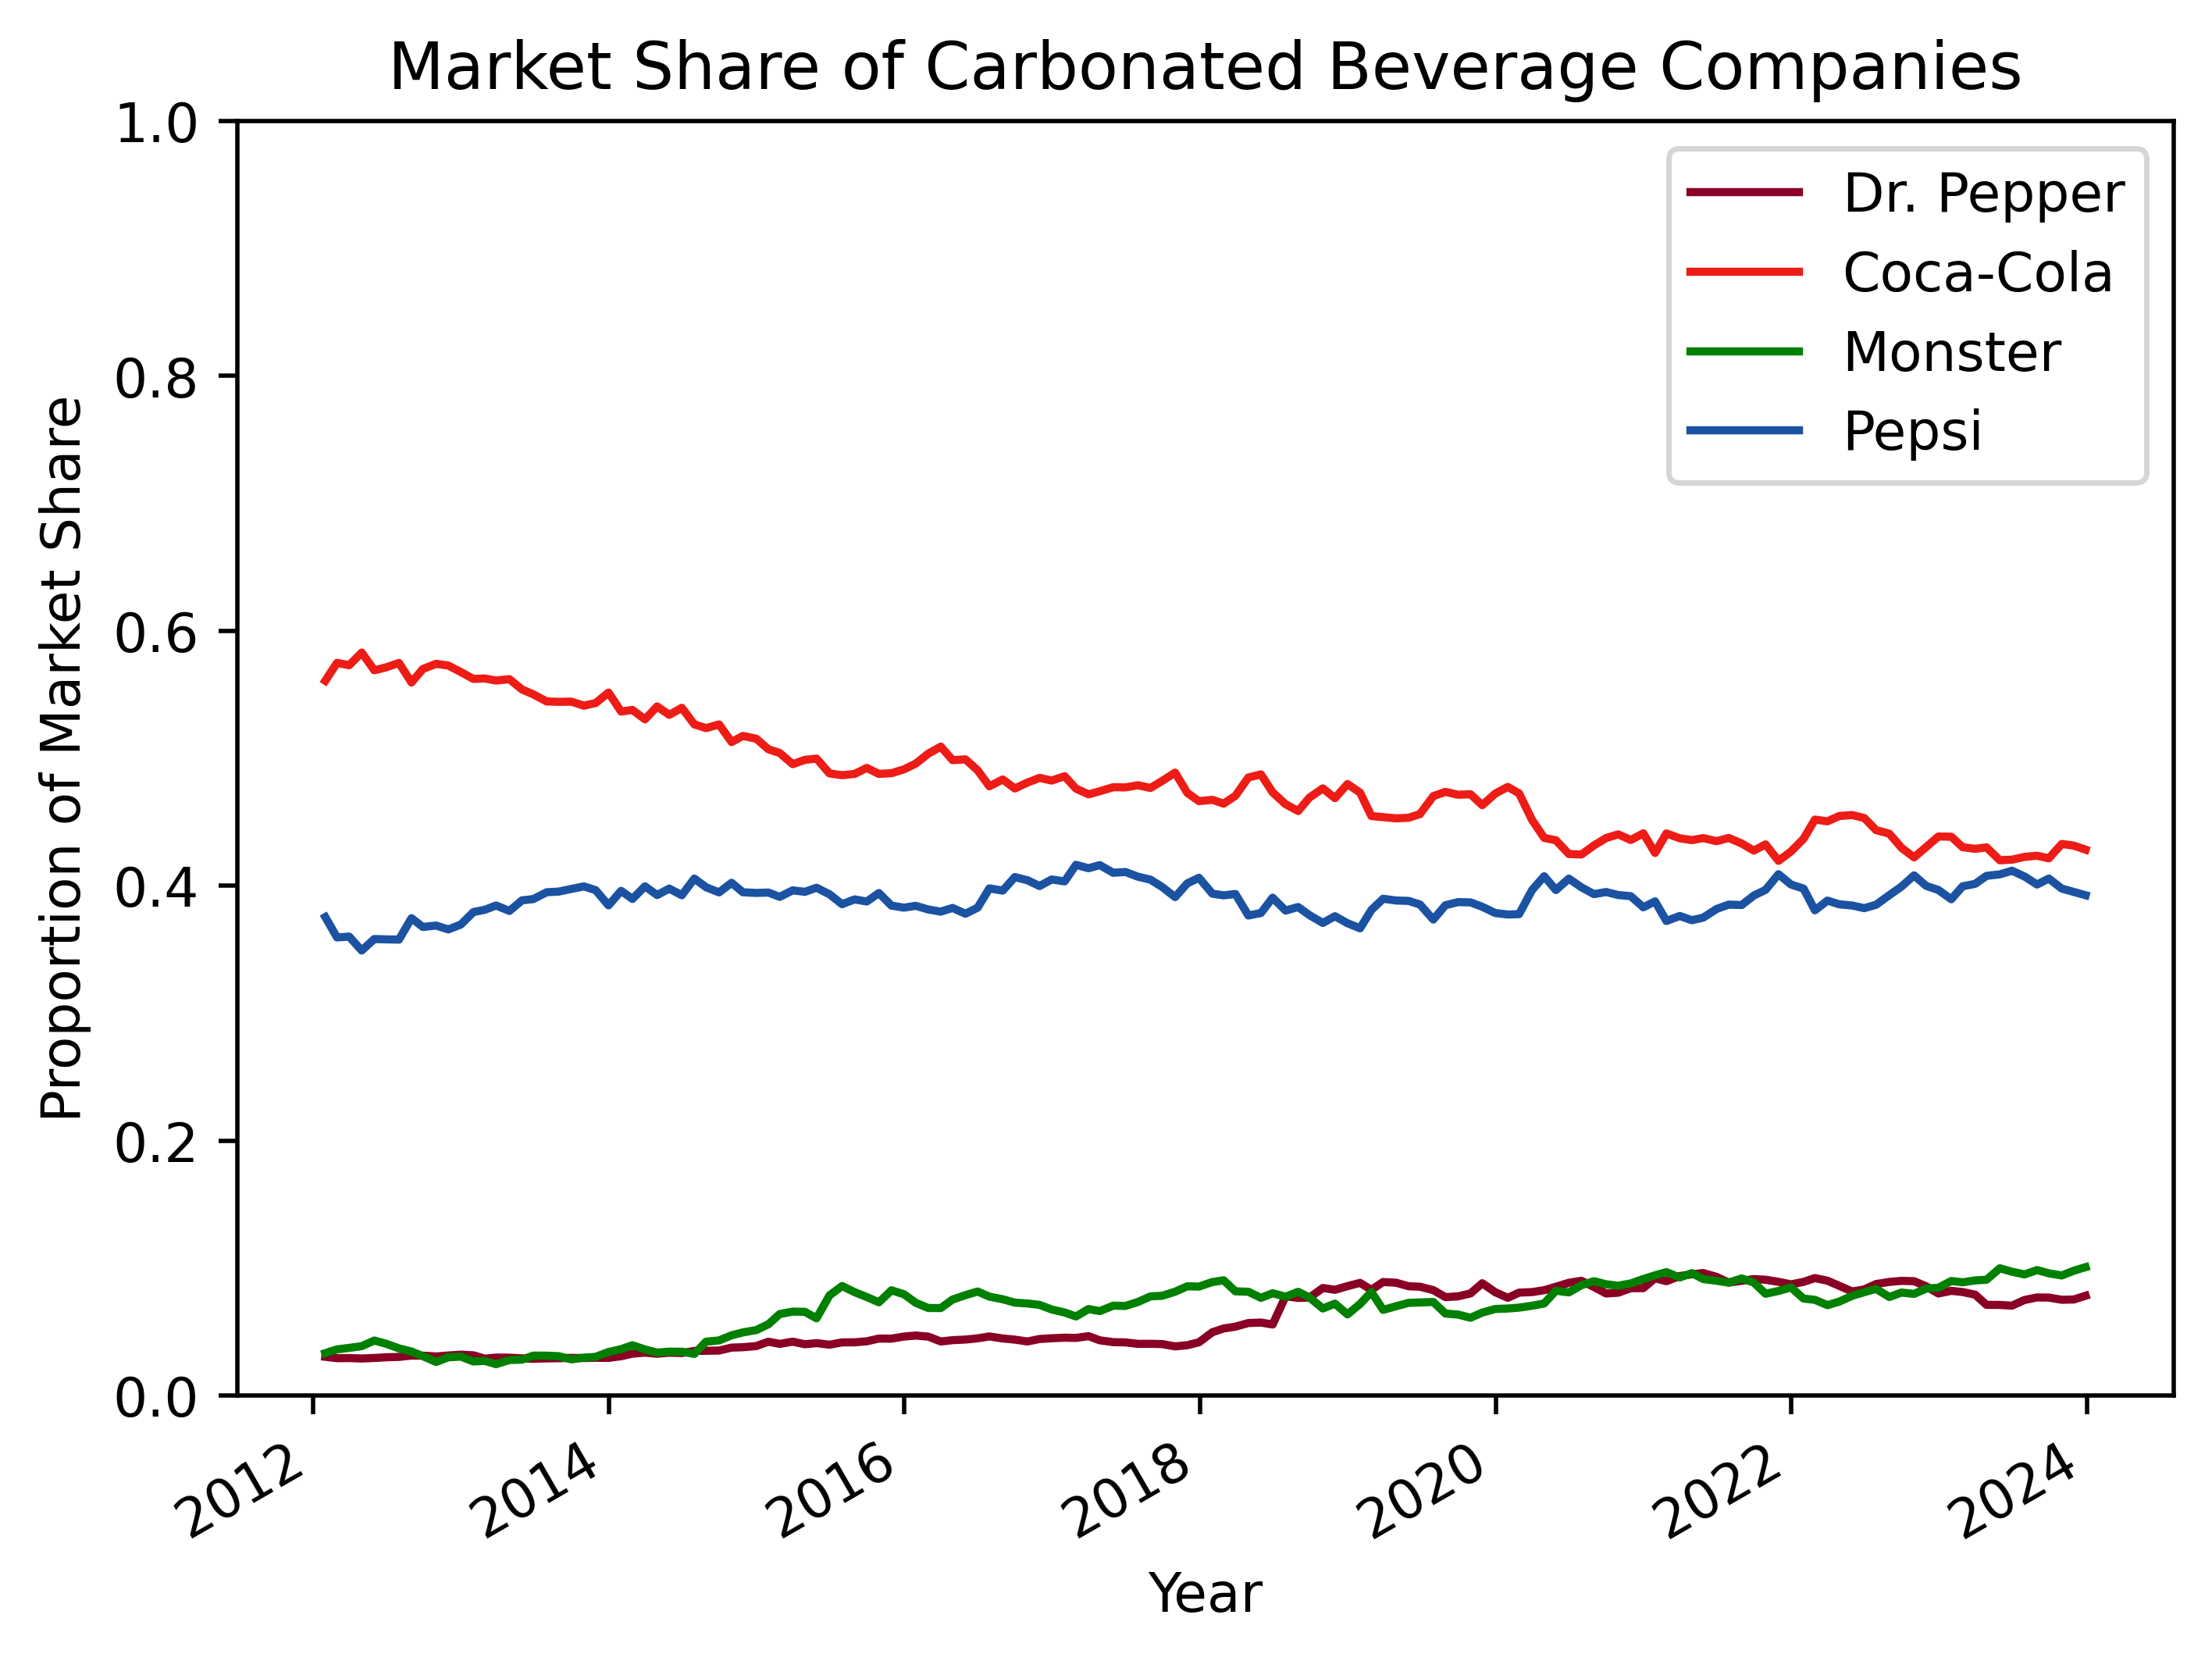

In [156]:
fig, ax = plt.subplots()
port.columns = ["Dr. Pepper", "Coca-Cola", "Monster", "Pepsi"]
port.plot(color=['#890024', '#ed1c16', 'green', '#1b52a2'], ax=ax)
#ax.legend(["Dr. Pepper", "Coca-Cola", "Monster", "Pepsi"])
plt.ylim([0.0, 1.0])
plt.ylabel("Proportion of Market Share")
plt.xlabel("Year")
plt.title("Market Share of Carbonated Beverage Companies")
plt.legend(loc='upper right')
plt.show()

In [157]:

window_size = 6

rolling_correlations = {}
for i in port2.columns:
    for j in port2.columns:
        if j != i:  
            rolling_correlations[j] = port2[i].rolling(window=window_size).corr(port2[j])

port2["beta_KO_PEP"] = port2["KO"].rolling(window=window_size).corr(port2["PEP"])
port2["beta_KO_Other"] = port2["KO"].rolling(window=window_size).corr(port2["Other"])

port2["beta_PEP_KO"] = port2["PEP"].rolling(window=window_size).corr(port2["KO"]) #COPY
port2["beta_PEP_Other"] = port2["PEP"].rolling(window=window_size).corr(port2["Other"])

port2["beta_Other_KO"] = port2["Other"].rolling(window=window_size).corr(port2["KO"]) #COPY
port2["beta_Other_PEP"] = port2["Other"].rolling(window=window_size).corr(port2["PEP"]) #COPY

port2["alpha_KO"] = port2["KO"].ewm(span=window_size, min_periods=window_size).mean()
port2["alpha_PEP"] = port2["PEP"].ewm(span=window_size, min_periods=window_size).mean()
port2["alpha_Other"] = port2["Other"].ewm(span=window_size, min_periods=window_size).mean()
port2

ticker,KO,PEP,Other,beta_KO_PEP,beta_KO_Other,beta_PEP_KO,beta_PEP_Other,beta_Other_KO,beta_Other_PEP,alpha_KO,alpha_PEP,alpha_Other
caldt,,,,,,,,,,,,
2012-01-31,0.560856,0.375433,0.063711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.574936,0.359477,0.065587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-30,0.573049,0.360135,0.066816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,0.582975,0.349198,0.067827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,0.569099,0.358212,0.072688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,0.423583,0.400983,0.175434,-0.477287,-0.512300,-0.477287,-0.510160,-0.512300,-0.510160,0.424820,0.404579,0.170601
2023-09-29,0.421522,0.405682,0.172796,-0.208766,-0.640619,-0.208766,-0.617200,-0.640619,-0.617200,0.423878,0.404894,0.171228
2023-10-31,0.432805,0.397820,0.169376,-0.851855,-0.116942,-0.851855,-0.420566,-0.116942,-0.420566,0.426428,0.402873,0.170699


In [158]:
# df = df.sort_values(by=['date', 'ticker'])

# # Rank each ticker on each date based on the growth metric
# df[growth_metrics] = df.groupby('date')[growth_metrics].rank(ascending=False, method='min')

# df

# df[growth_metrics] = df.groupby('date')[growth_metrics].rank(axis=0)

# df = df.reset_index(drop=True)

# df["alpha"] = df[growth_metrics].mean(axis=1)


# df

In [159]:
# df = df.reset_index(drop=True)

# df["alpha"] = df[growth_metrics].mean(axis=1)
# df = df.dropna()
# df = df.query("date >= '2012-01'")
# df


In [160]:
port2.head(6)

ticker,KO,PEP,Other,beta_KO_PEP,beta_KO_Other,beta_PEP_KO,beta_PEP_Other,beta_Other_KO,beta_Other_PEP,alpha_KO,alpha_PEP,alpha_Other
caldt,,,,,,,,,,,,
2012-01-31,0.560856,0.375433,0.063711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.574936,0.359477,0.065587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-30,0.573049,0.360135,0.066816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-30,0.582975,0.349198,0.067827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-31,0.569099,0.358212,0.072688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-06-29,0.571347,0.357948,0.070705,-0.924031,0.185092,-0.924031,-0.546742,0.185092,-0.546742,0.572642,0.358004,0.069354


In [161]:
port2.index

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30',
               '2012-05-31', '2012-06-29', '2012-07-31', '2012-08-31',
               '2012-09-28', '2012-10-31',
               ...
               '2023-03-31', '2023-04-28', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-29', '2023-10-31',
               '2023-11-30', '2023-12-29'],
              dtype='datetime64[ns]', name='caldt', length=144, freq=None)

In [162]:
#filtered_data = port2.iloc[port2['caldt'] == '2012-06-29']
y0 = np.array(port2.query('caldt == "2012-06-29"'))[0][:3]
#port2.loc["caldt == 2012-06-29"]
alphas = np.array(port2.query('caldt >= "2012-06-29"')[["alpha_KO",	"alpha_PEP", "alpha_Other"]])
KO_alpha = alphas[:,0]
PEP_alpha = alphas[:,1]
Other_alpha = alphas[:,2]

KO_betas = np.array(port2.query('caldt >= "2012-06-29"')[["beta_KO_PEP","beta_KO_Other"]])
PEP_betas = np.array(port2.query('caldt >= "2012-06-29"')[["beta_PEP_KO","beta_PEP_Other"]])
Other_betas = np.array(port2.query('caldt >= "2012-06-29"')[["beta_Other_KO","beta_Other_PEP"]])
betas = np.array([KO_betas, PEP_betas, Other_betas])

y0

array([0.57134721, 0.35794813, 0.07070466])

In [163]:
def final_ode(t, y, alphas, betas):
    alpha = alphas[int(t)] 
    alpha[0] = alpha[0] / 10
    alpha[1] = alpha[1] / 10 
    alpha[2] = alpha[2] / 10


    betas = betas / 100
    K = 2/3
    dydt = np.zeros(3)
    for i in range(3):
        competitive_term = np.sum([betas[i][int(t)][j] * y[j] for j in range(2)])
        dydt[i] = y[i] * (alpha[i] * (1 - y[i] / K) - competitive_term)

    return dydt

# def final_ode(t, y, alphas, betas):
#     return y

In [164]:

t0 = 0
tf = 138

x_space = np.linspace(t0, tf, 1000)

sol = solve_ivp(final_ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000), args=[alphas, betas])
#sol = solve_ivp(final_ode, y0=y0, t_eval=np.linspace(t0, tf, 1000), args=[alphas, betas])
sol.y = sol.y / np.sum(sol.y, axis=0)

#Plot the system
# plt.plot(x_space, sol.y[0],  label=f"Coca-Cola")
# plt.plot(x_space, sol.y[1],  label=f"Pepsi")
# plt.plot(x_space, sol.y[2],  label=f"Other")

    

In [165]:
port2 = np.array(port2.query('caldt >= "2012-06-29"'))[:, :3]
port2

array([[0.57134721, 0.35794813, 0.07070466],
       [0.5748691 , 0.35775801, 0.06737289],
       [0.55951162, 0.37457965, 0.06590873],
       [0.57007683, 0.36769517, 0.062228  ],
       [0.57417385, 0.36877568, 0.05705047],
       [0.5727752 , 0.36575143, 0.06147337],
       [0.56770766, 0.36960214, 0.0626902 ],
       [0.56231372, 0.37937592, 0.05831036],
       [0.56265405, 0.3811475 , 0.05619846],
       [0.56103461, 0.3845392 , 0.05442619],
       [0.56212298, 0.38025863, 0.05761839],
       [0.55406602, 0.38856189, 0.05737209],
       [0.55021296, 0.3895636 , 0.06022344],
       [0.54462869, 0.39491088, 0.06046043],
       [0.54434665, 0.39545149, 0.06020186],
       [0.54448201, 0.39753238, 0.05798561],
       [0.54132853, 0.399512  , 0.05915947],
       [0.54338844, 0.39658298, 0.06002858],
       [0.55162413, 0.3846296 , 0.06374627],
       [0.53669226, 0.39603571, 0.06727203],
       [0.53799479, 0.3896711 , 0.07233411],
       [0.53060417, 0.39956984, 0.06982598],
       [0.

In [166]:
len(sol.t)

1000

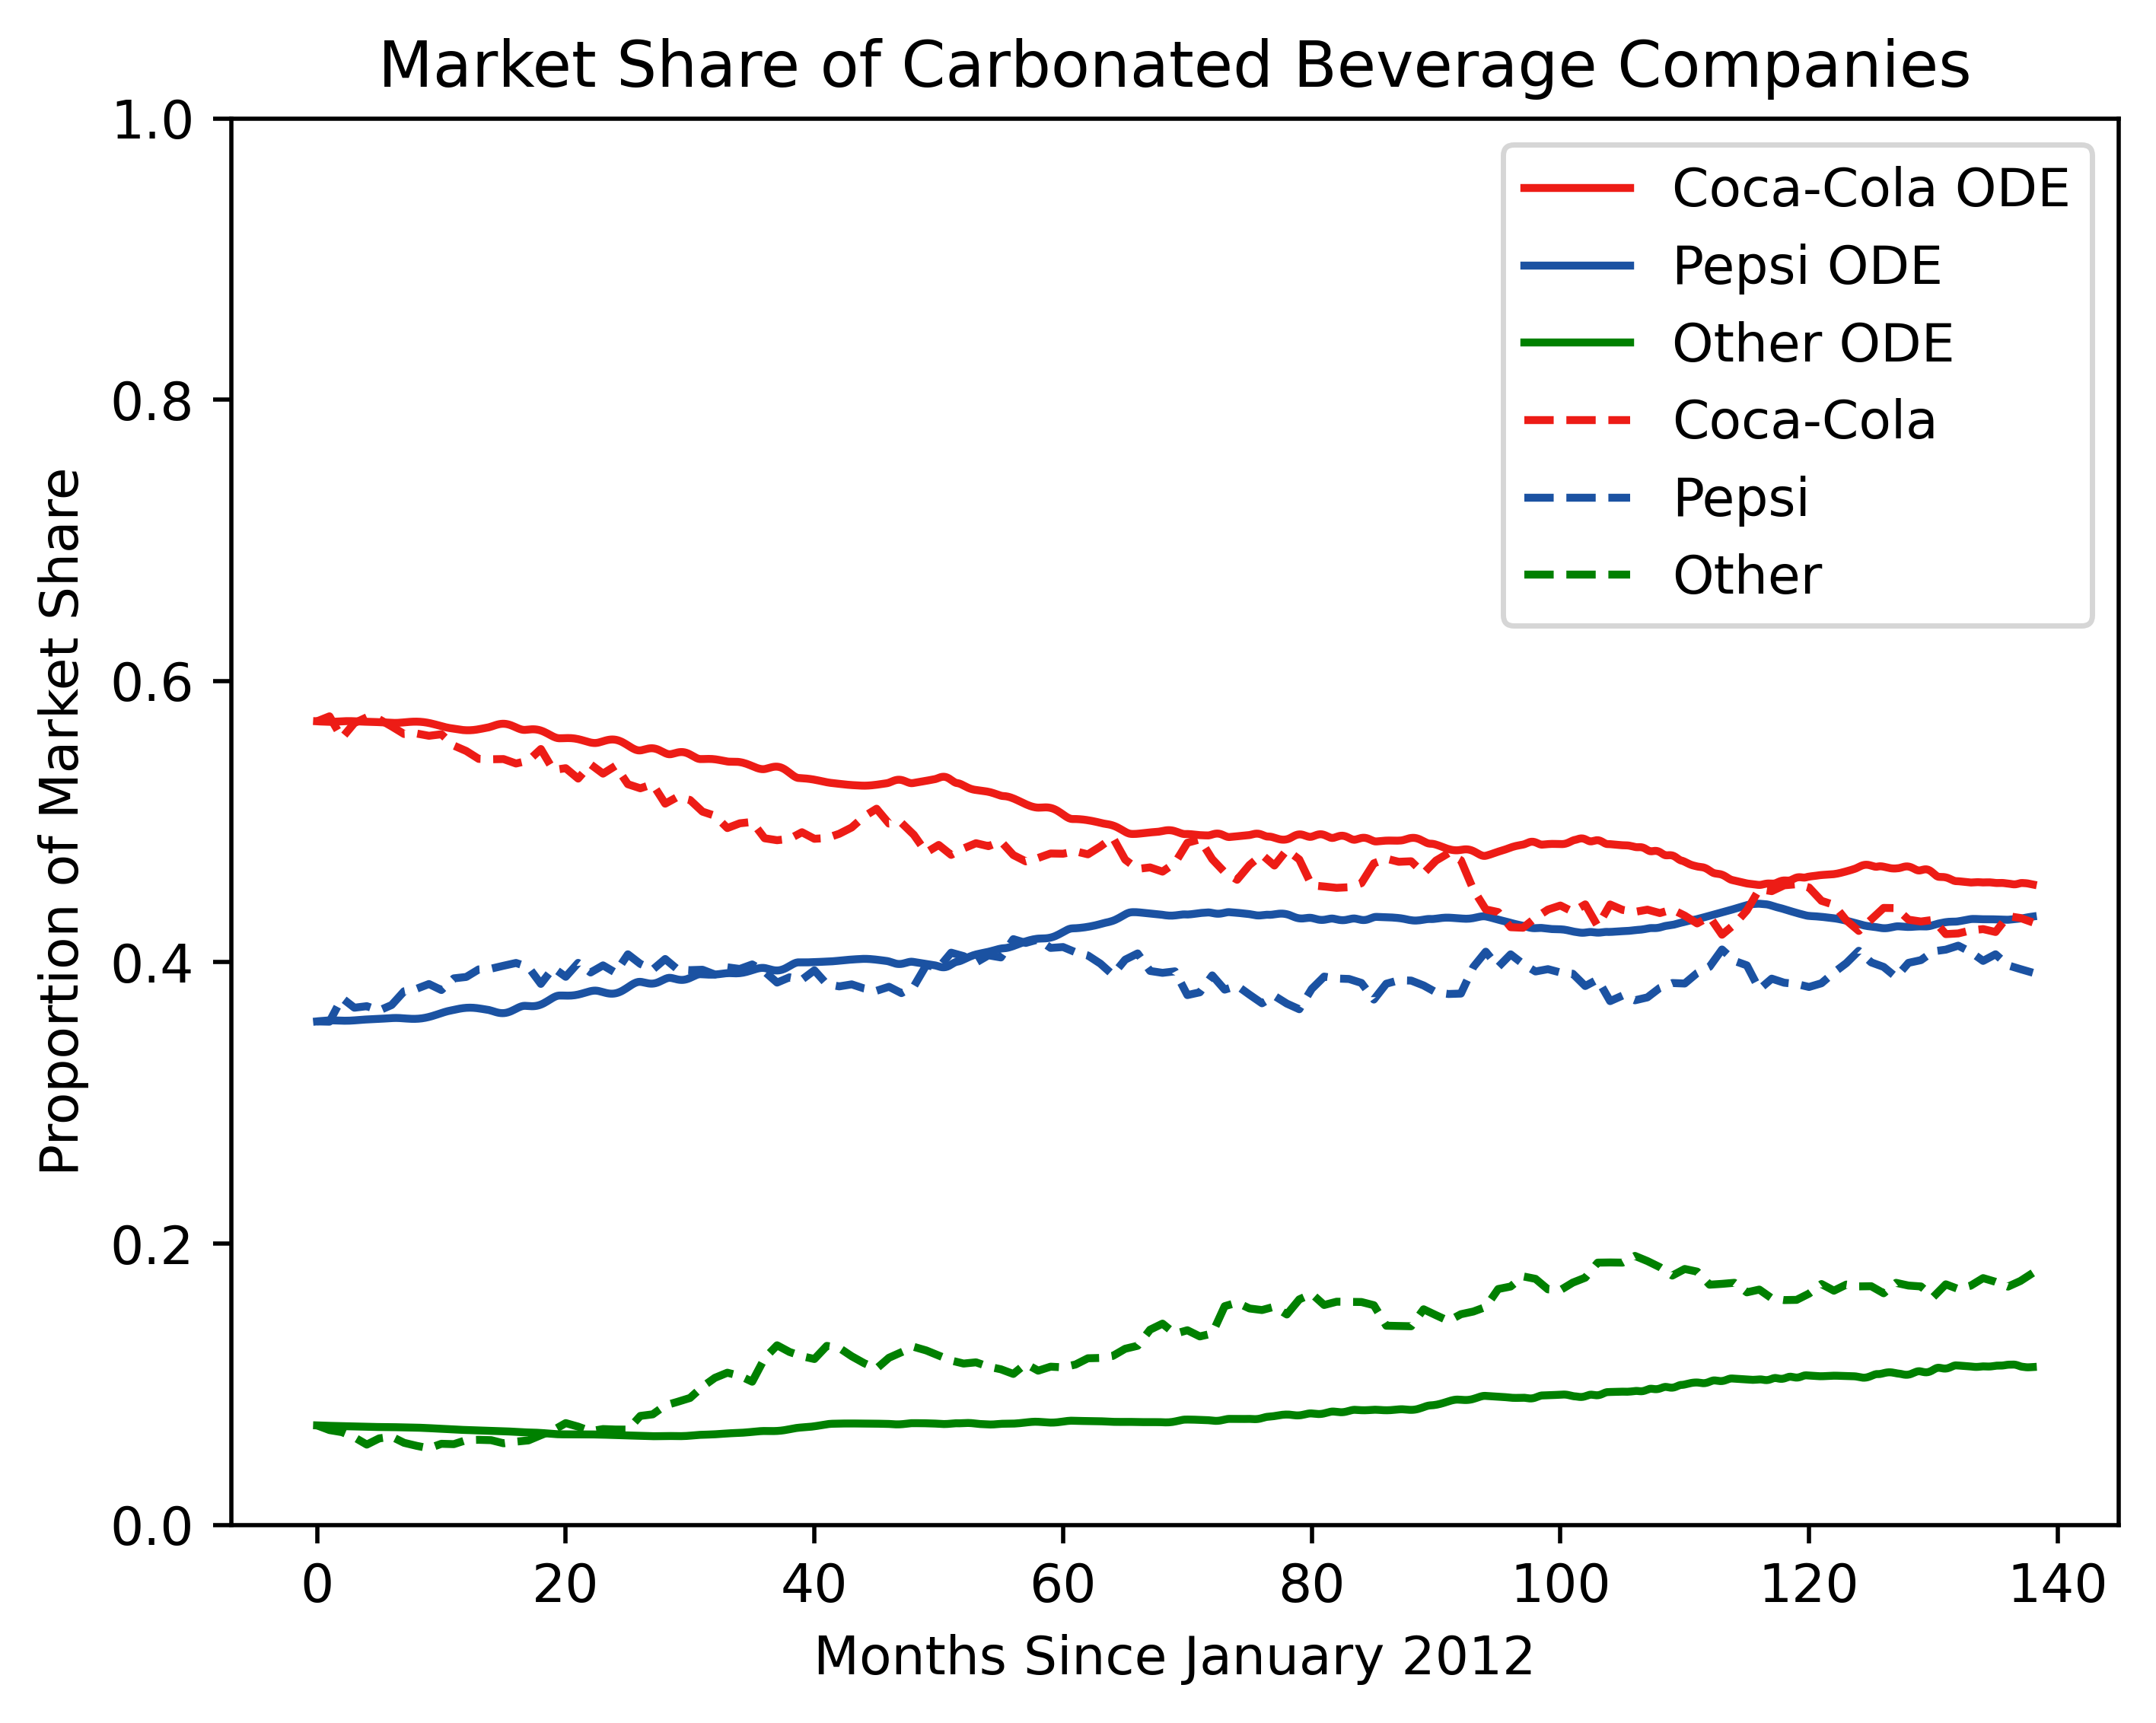

In [167]:
plt.plot(sol.t, sol.y[0], color = '#ed1c16', ls = '-', label=f"Coca-Cola Model")
plt.plot(sol.t, sol.y[1], color = '#1b52a2', ls = '-', label=f"Pepsi Model")
plt.plot(sol.t, sol.y[2],  color = 'green', ls = '-', label=f"Other Model")
plt.plot(np.linspace(t0, tf, 139), port2[:, 0], color = '#ed1c16', ls = '--', label=f"Coca-Cola Actual")
plt.plot(np.linspace(t0, tf, 139), port2[:, 1], color = '#1b52a2', ls = '--', label=f"Pepsi Actual")
plt.plot(np.linspace(t0, tf, 139), port2[:, 2],  color = 'green', ls = '--', label=f"Other Actual")


plt.ylabel("Proportion of Market Share")
plt.xlabel("Months Since January 2012")
plt.title("Market Share of Carbonated Beverage Companies")
plt.ylim(0, 1)
plt.legend()

plt.show()

In [168]:
# K0_alpha = alphas[:,0]
# PEP_alpha = alphas[:,1]
# Other_alpha = alphas[:,2]
fake_alp= np.array([KO_alpha.mean(), PEP_alpha.mean(), Other_alpha.mean()]) 
#betas = np.array([KO_betas, PEP_betas, Other_betas])
#PEP_betas[:,0].mean()
#KO_betas

betas = np.array([[1, -.64, -.41],
          [-.64, 1, -.26],
          [-.41, -.26, 1]]) / 100

In [169]:
fake_alp

array([0.02407008, 0.01852798, 0.00476828])

In [170]:
betas

array([[ 0.01  , -0.0064, -0.0041],
       [-0.0064,  0.01  , -0.0026],
       [-0.0041, -0.0026,  0.01  ]])

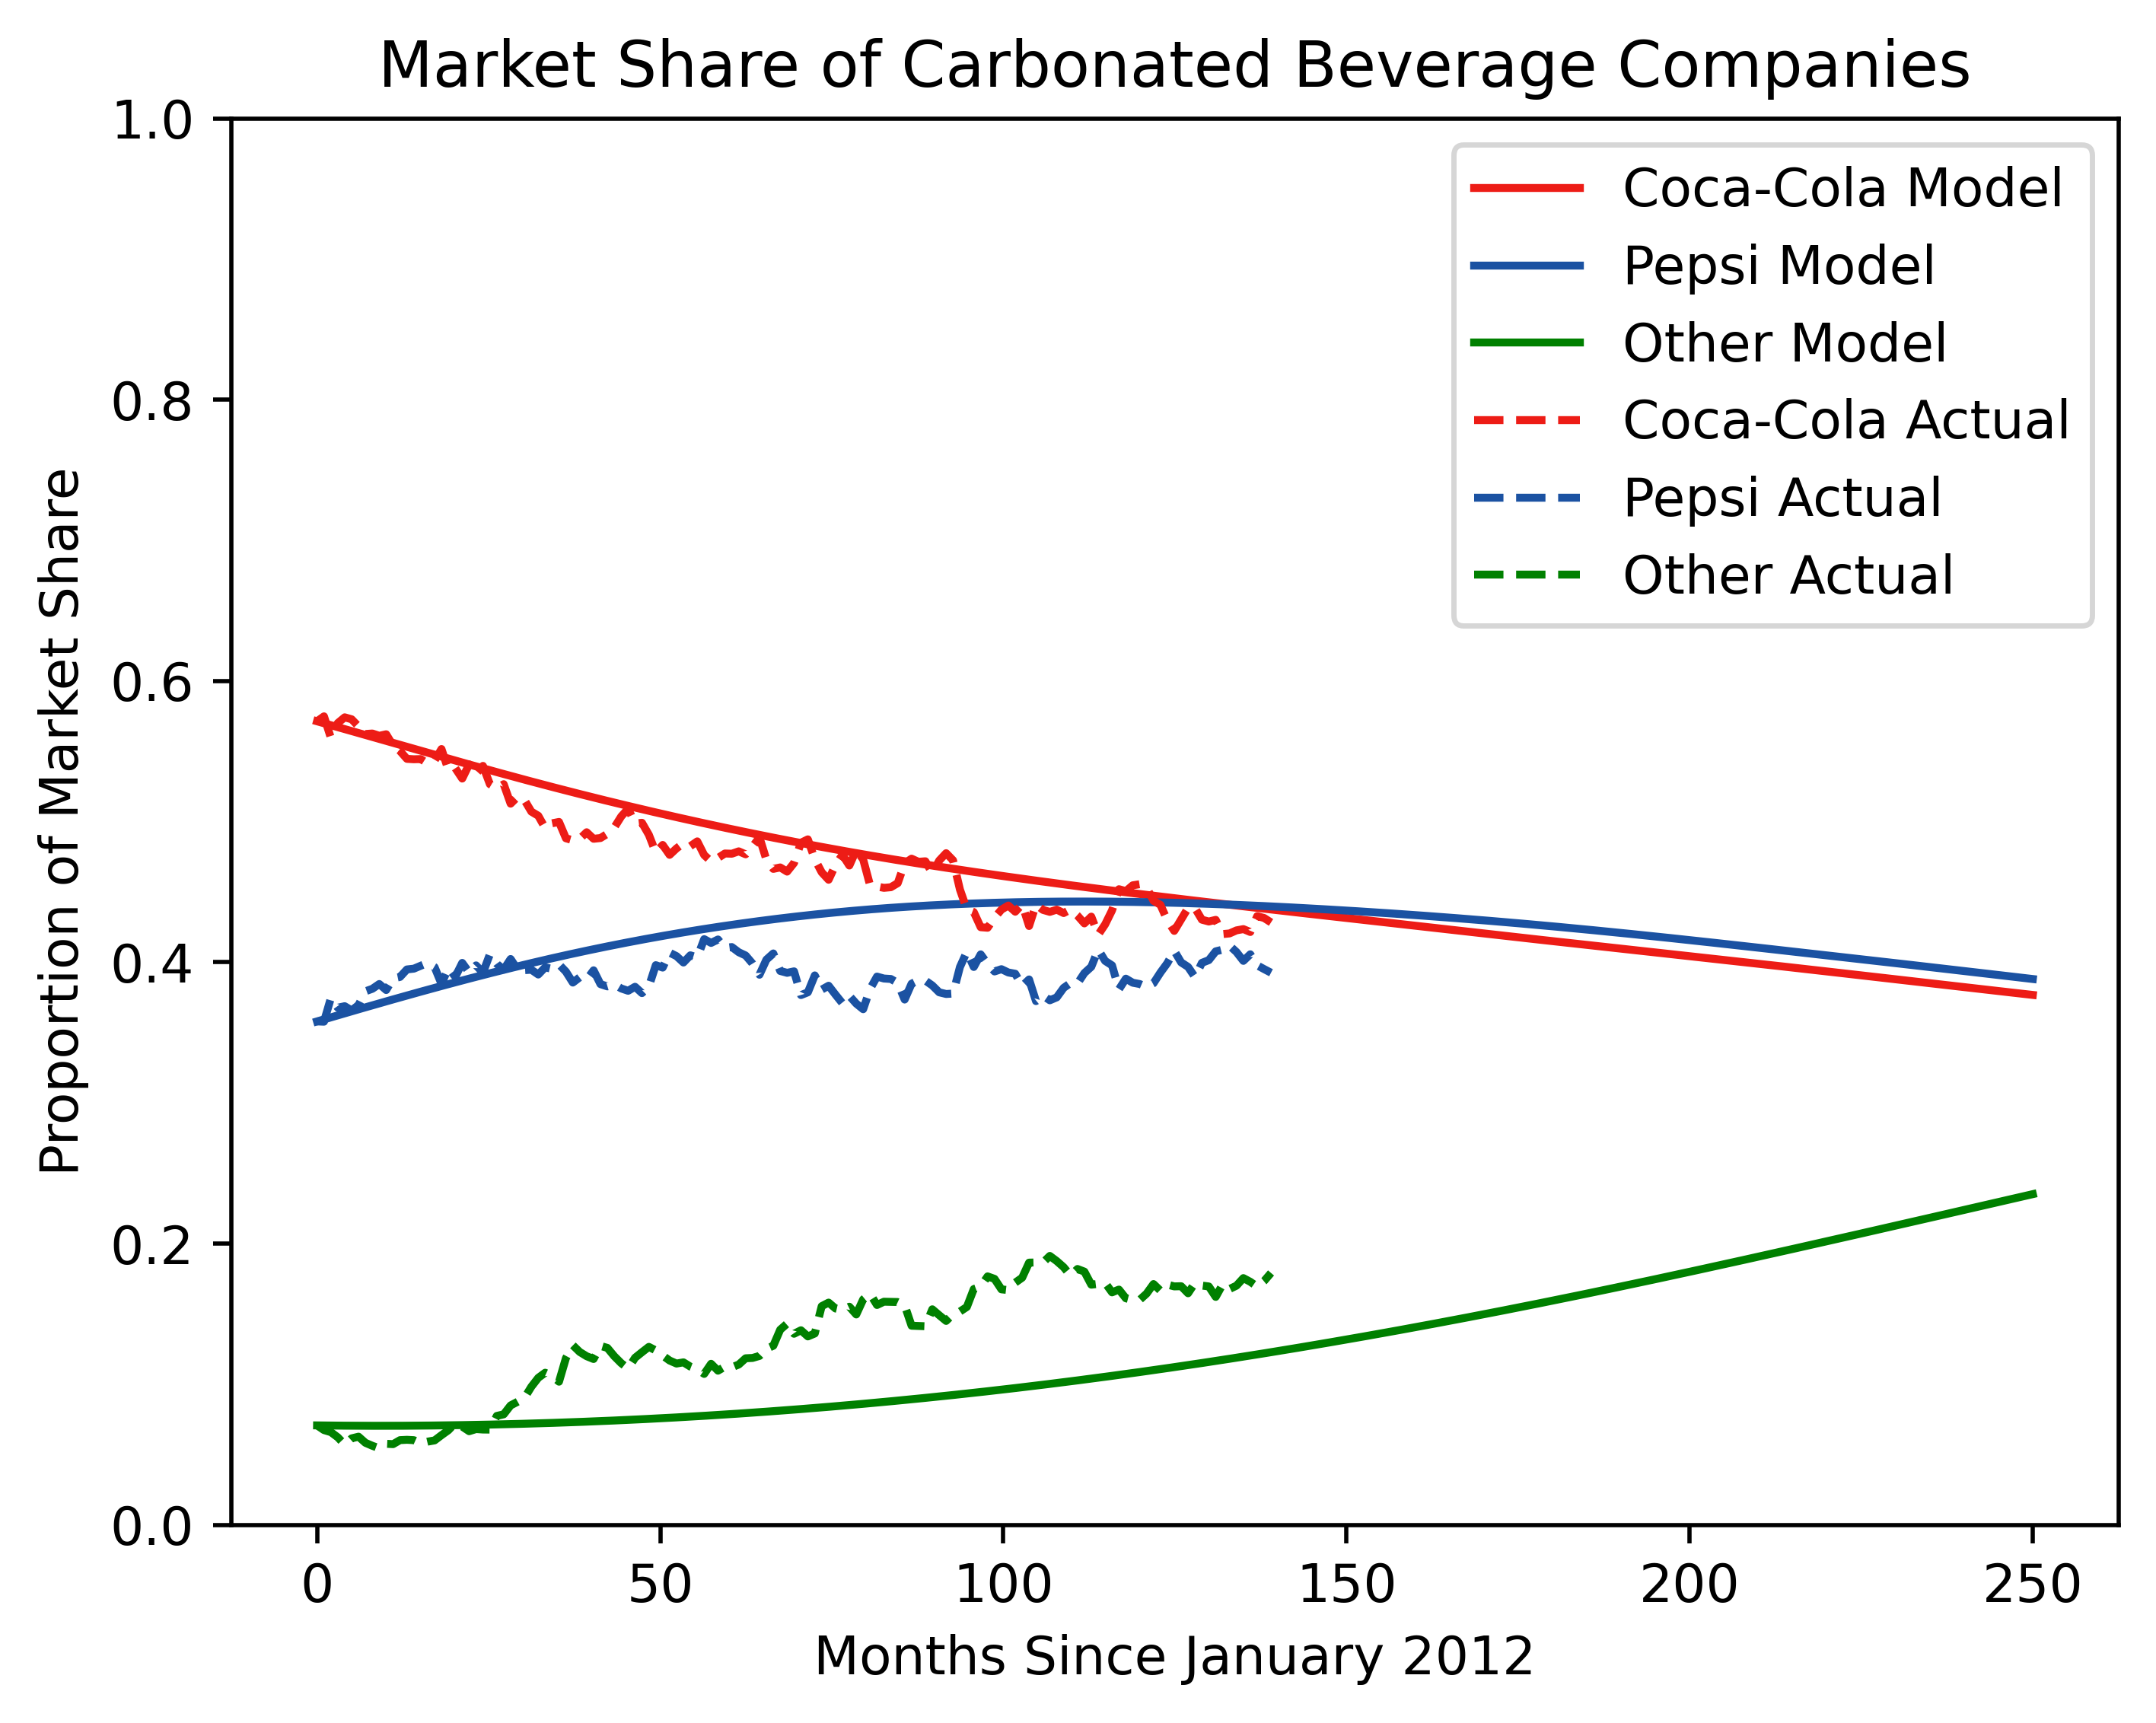

In [171]:
def event_based_model():
    #np.random.seed(44)
    K = 2/3

    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(3)
        temporary_alpha = fake_alp.copy()  
        for i in range(3):
            competitive_term = np.sum([betas[i, j] * y[j] for j in range(3) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 250
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    #y0 = np.array([0.1, 0.2, 0.3, 0.15, 0.15])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    #Plot the system
    plt.plot(sol.t, sol.y[0], color = '#ed1c16', ls = '-', label=f"Coca-Cola Model")
    plt.plot(sol.t, sol.y[1], color = '#1b52a2', ls = '-', label=f"Pepsi Model")
    plt.plot(sol.t, sol.y[2],  color = 'green', ls = '-', label=f"Other Model")
    plt.plot(np.linspace(t0, 139, 139), port2[:, 0], color = '#ed1c16', ls = '--', label=f"Coca-Cola Actual")
    plt.plot(np.linspace(t0, 139, 139), port2[:, 1], color = '#1b52a2', ls = '--', label=f"Pepsi Actual")
    plt.plot(np.linspace(t0, 139, 139), port2[:, 2],  color = 'green', ls = '--', label=f"Other Actual")


    plt.ylabel("Proportion of Market Share")
    plt.xlabel("Months Since January 2012")
    plt.title("Market Share of Carbonated Beverage Companies")
    plt.ylim(0, 1)
    plt.legend()

    plt.show()
    return sol.y, fake_alp, betas
    
solution = event_based_model()

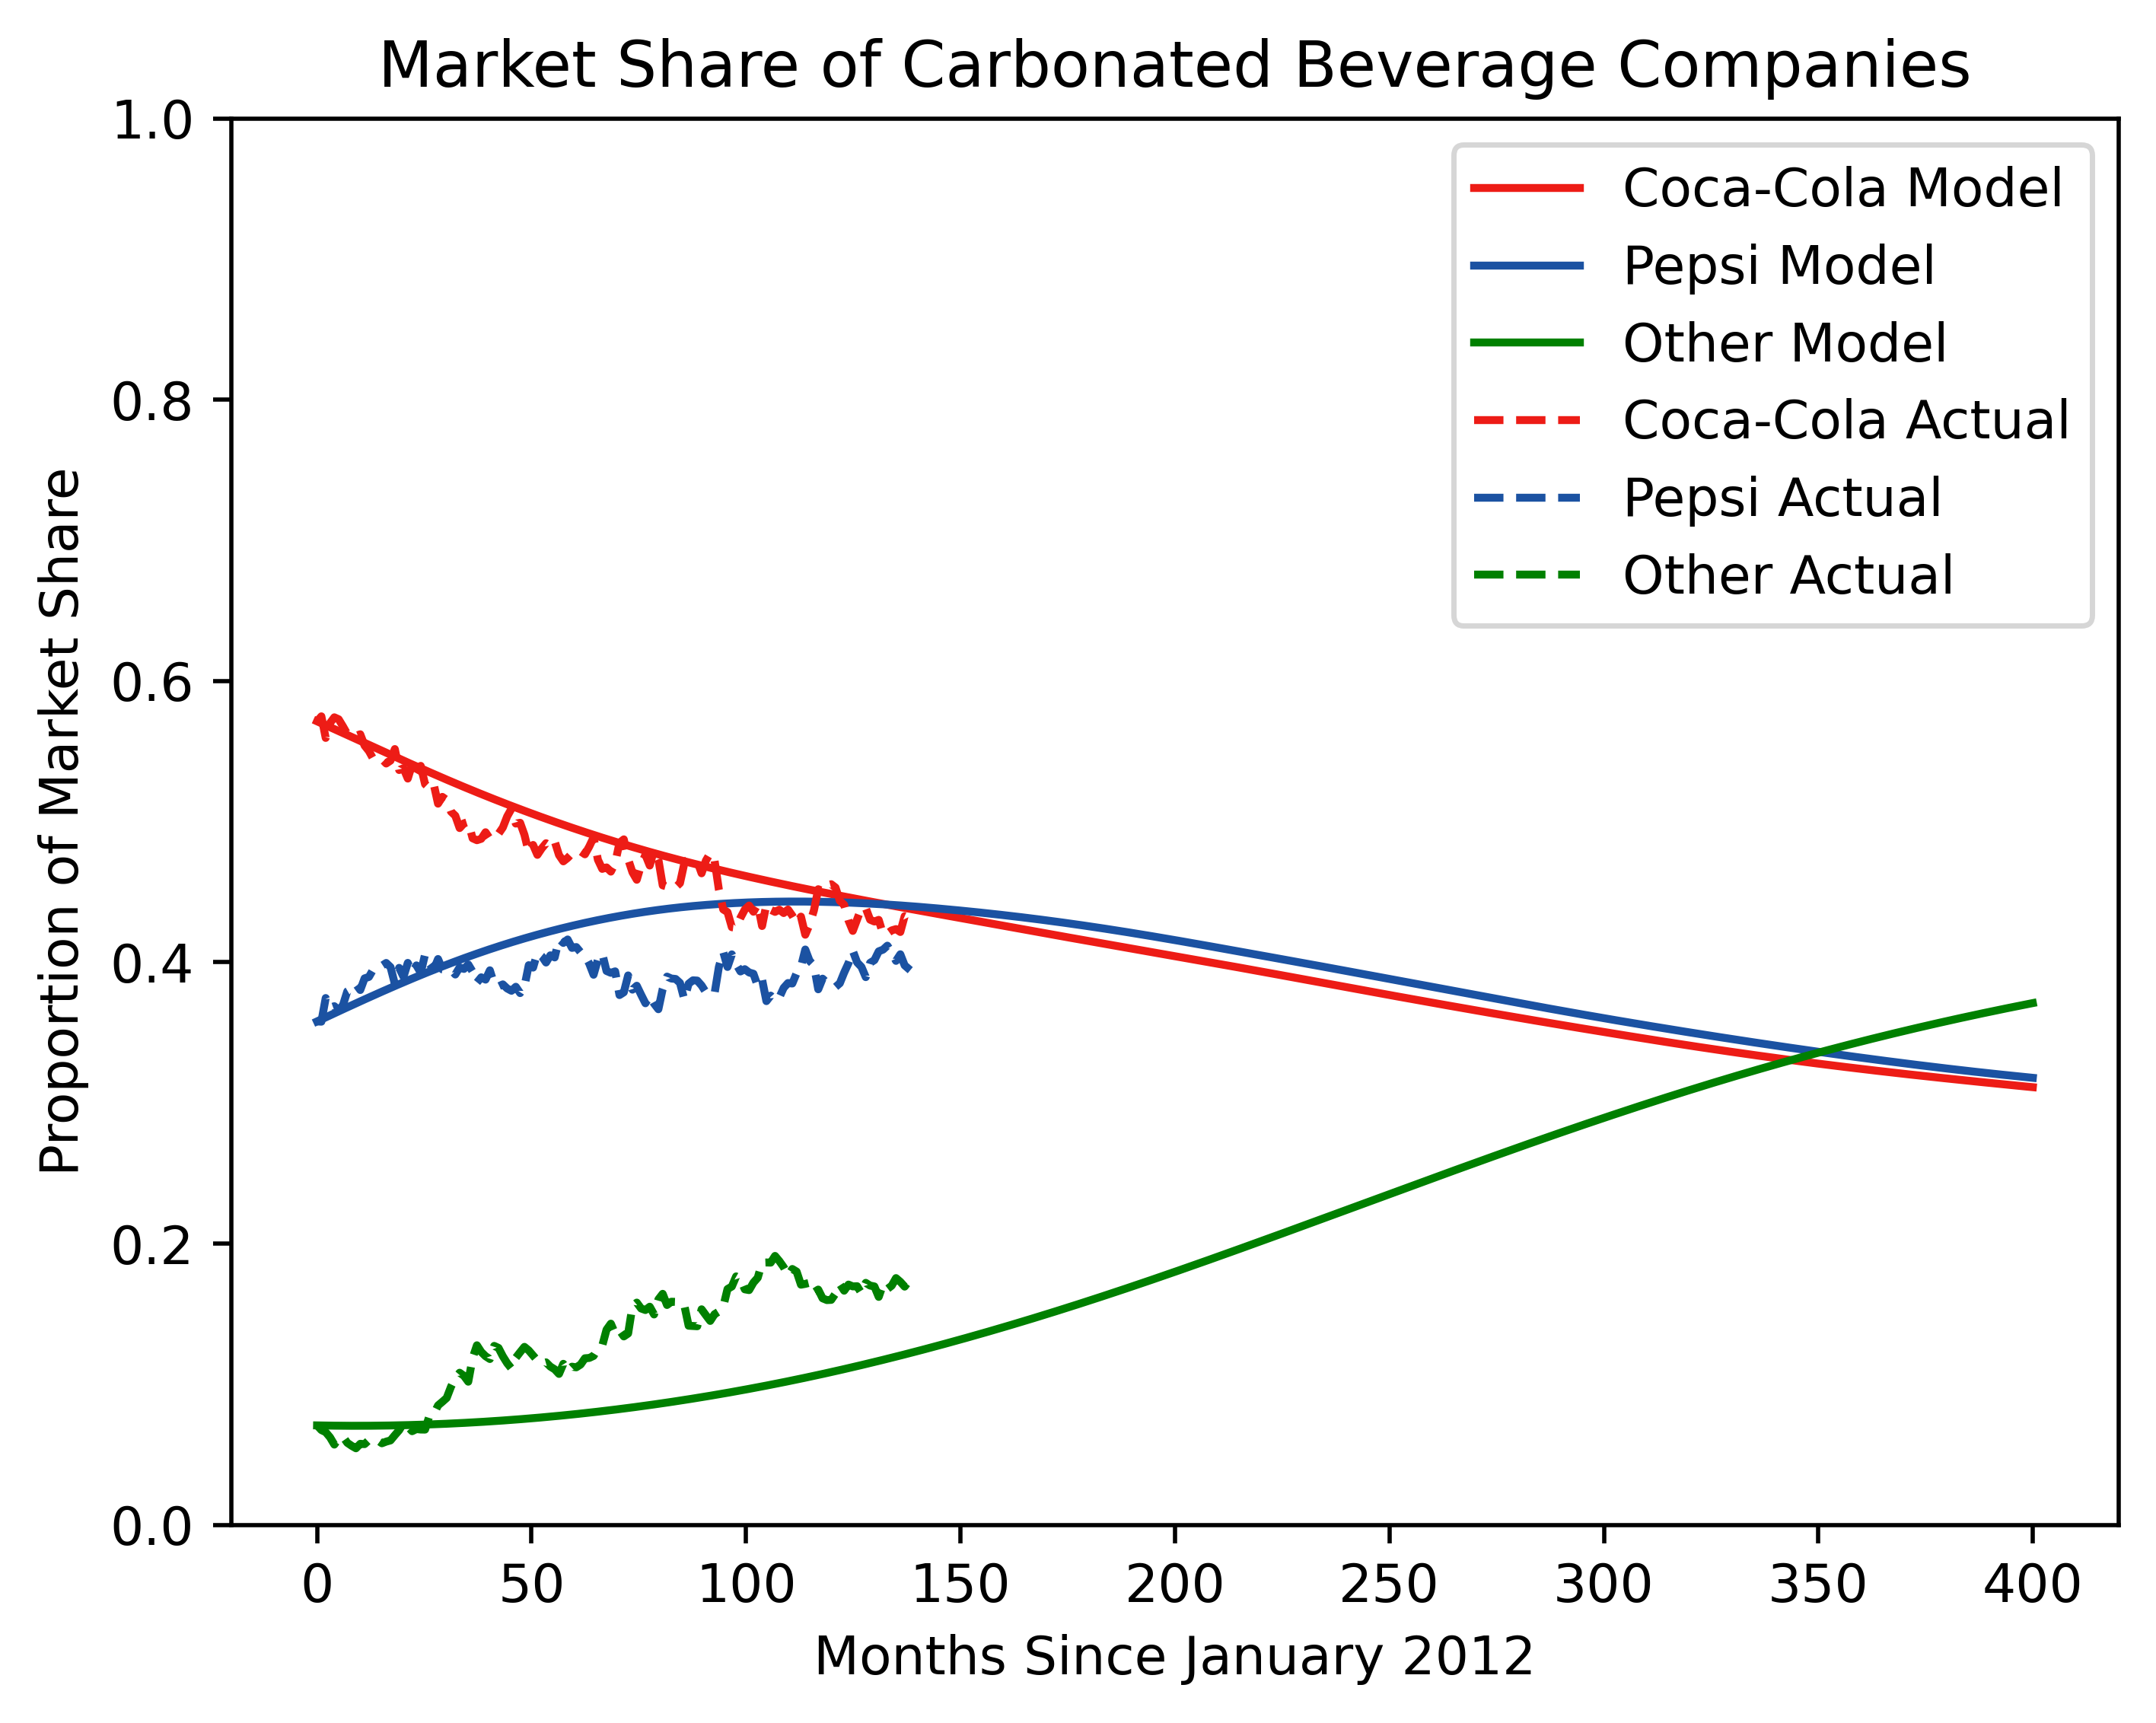

In [172]:
def event_based_model():
    #np.random.seed(44)
    K = 2/3

    # beta_values = (beta_values + beta_values.T) / 2
    
    
    def ode(t, y):
        dydt = np.zeros(3)
        temporary_alpha = fake_alp.copy()  
        for i in range(3):
            competitive_term = np.sum([betas[i, j] * y[j] for j in range(3) if j != i])
            dydt[i] = y[i] * (temporary_alpha[i] * (1 - y[i] / K) - competitive_term)
        return dydt

    t0 = 0
    tf = 400
    x_space = np.linspace(0, tf, 1000)
    
    #Define y0 and solution
    #y0 = np.array([0.1, 0.2, 0.3, 0.15, 0.15])
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 1000))
    sol.y = sol.y / np.sum(sol.y, axis=0)
    
    #Plot the system
    #Plot the system
    plt.plot(sol.t, sol.y[0], color = '#ed1c16', ls = '-', label=f"Coca-Cola Model")
    plt.plot(sol.t, sol.y[1], color = '#1b52a2', ls = '-', label=f"Pepsi Model")
    plt.plot(sol.t, sol.y[2],  color = 'green', ls = '-', label=f"Other Model")
    plt.plot(np.linspace(t0, 139, 139), port2[:, 0], color = '#ed1c16', ls = '--', label=f"Coca-Cola Actual")
    plt.plot(np.linspace(t0, 139, 139), port2[:, 1], color = '#1b52a2', ls = '--', label=f"Pepsi Actual")
    plt.plot(np.linspace(t0, 139, 139), port2[:, 2],  color = 'green', ls = '--', label=f"Other Actual")


    plt.ylabel("Proportion of Market Share")
    plt.xlabel("Months Since January 2012")
    plt.title("Market Share of Carbonated Beverage Companies")
    plt.ylim(0, 1)
    plt.legend()

    plt.show()
    return sol.y, fake_alp, betas
    
solution = event_based_model()